# Contradictory claims -- context association analyses

Dan Sosa

Updated: 5/21/21

This notebook features completed pipeline for context-relation association analyses, including descriptive statistics, classification, and some downstream analyses. 

### Initial pipeline for loading data and extracting papers

In [28]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features

print("Done loading pkg")

contra_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv"
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"


dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
# NOTE! Make sure to parse_annotated first. Need to fix code to not overwrite
dl.parse_annotated_full_texts(cell_type_only=True) # tot: 21243
print("Done with full texts")
dl.parse_relationships_file()
print("Done with relationships")
all_annotators_df, annotated_connects = dl.parse_annotation_files_for_ena()

if not path.exists(contra_df_path):
    print("Need to extract features for Contradictions papers corpus") # Will take 1h20!
    #contra_df = extract_features(dl.paper_pile, no_cell_line=True) # NOTE We don't have MeSH headings for these yet....
    #contra_df.to_csv(contra_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for Contradictions papers")
    contra_df = pd.read_csv(contra_df_path)
    print("Loaded.")
    
if not path.exists(ena_df_path):
    print("Need to extract features for ENA papers corpus")
    #ena_df = extract_features(dl.ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=True, is_enrique=True)
    #ena_df.to_csv(ena_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for ENA papers")
    ena_df = pd.read_csv(ena_df_path)
    print("Loaded.")    

    

print(len(contra_df))
print(len(ena_df))
print(len(dl.paper_pile))


Done loading pkg
Done initializing
0 full texts read (of 21243)
No PMC for record 95
No PMC for record 111
No abstract for record PMC5509451
No title for record PMC4757870
No PMC for record 291
No abstract for record PMC5599977
No abstract for record PMC3953084
No title for record PMC6896798
No PMC for record 655
No abstract for record PMC6220479
No abstract for record PMC5482590
No abstract for record PMC4075648
No PMC for record 982
1000 full texts read (of 21243)
No text for record PMC2478564
No abstract for record PMC526782
No PMC for record 1419
No abstract for record PMC4694057
No PMC for record 1744
No PMC for record 1921
No title for record PMC6361748
No PMC for record 1984
No PMC for record 1993
No PMC for record 1993
2000 full texts read (of 21243)
No abstract for record PMC3784508
No PMC for record 2089
No abstract for record PMC7113201
No abstract for record PMC5374603
No abstract for record PMC3287601
No title for record PMC6803382
No abstract for record PMC4044980
No abst

/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/DataLoader.py:214: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Extracted features file found for Contradictions papers
Loaded.
Extracted features file found for ENA papers
Loaded.
1102208
30239
21209


In [6]:
ena_df.columns

Index(['paper_id', 'rel', 'con', 'con_sent', 'con_type', 'ent_1', 'ent_2',
       'sent_dist', 'sec_dist', 'rel_sec', 'norm_rel_sec', 'con_sec',
       'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'con_in_mesh_headings',
       'annotation', 'min_sent_dist', 'is_closest_cont_by_sent'],
      dtype='object')

## Descriptive Statistics

### Number of context-event section-level co-occurrences

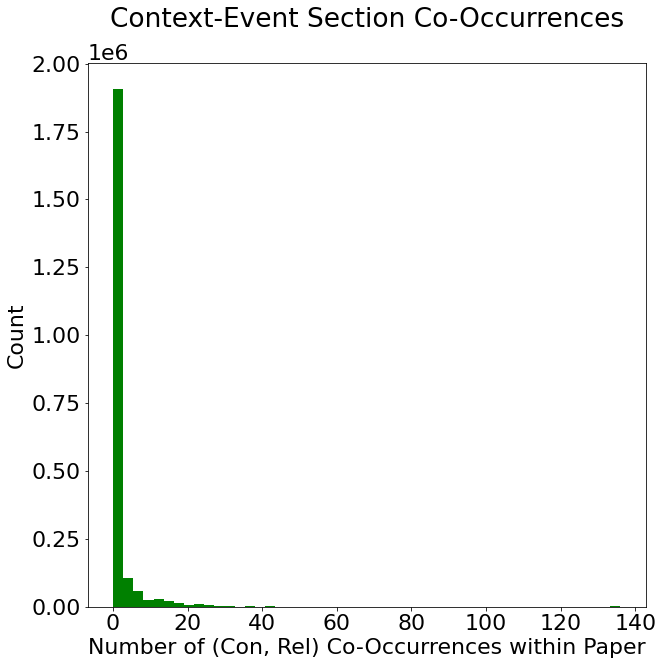

In [7]:
import matplotlib
import matplotlib.pyplot as plt

# Co-occurrences

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 22})

            
co_occur_cts = list(contra_df.num_sec_cooccur_ent_1) + list(contra_df.num_sec_cooccur_ent_2)

plt.hist(co_occur_cts, bins = 50, color="green")
    
plt.title("Context-Event Section Co-Occurrences\n")
plt.xlabel("Number of (Con, Rel) Co-Occurrences within Paper")
plt.ylabel("Count")
plt.show()

### Distributions of Sentence and Paragraph Distances

Text(0.04, 0.5, 'Count')

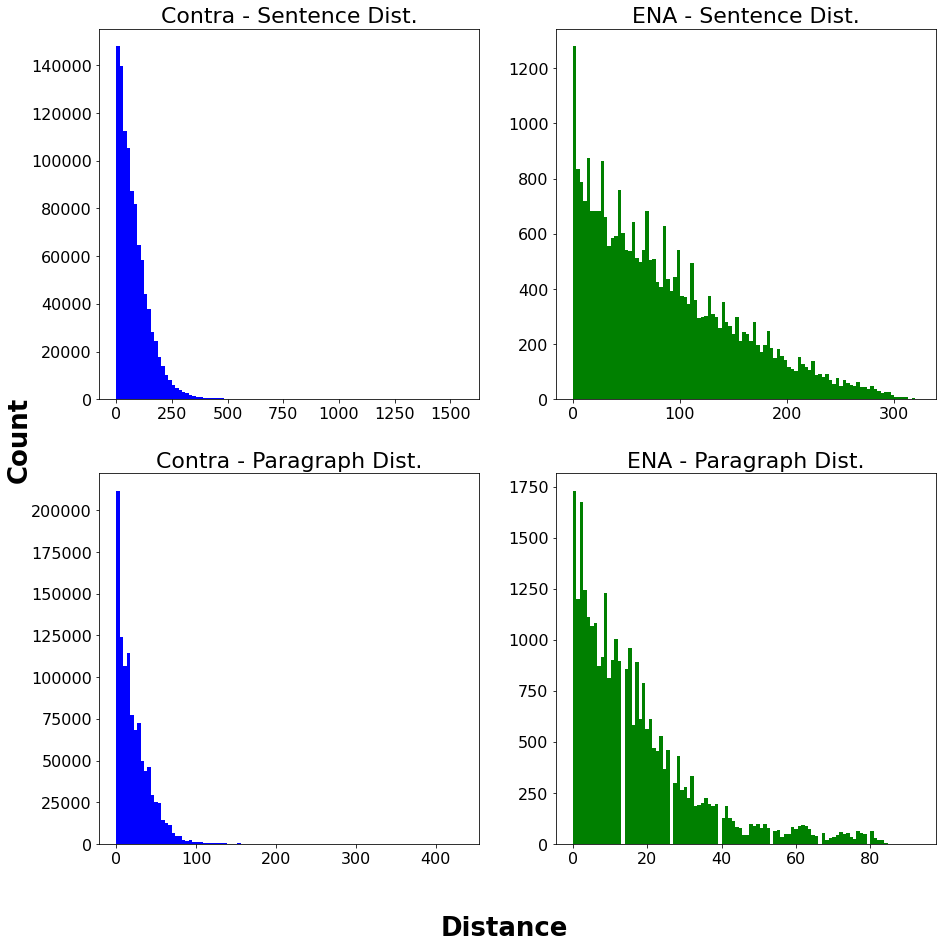

In [8]:
import matplotlib
import matplotlib.pyplot as plt

# Distances

plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0,0].hist(list(contra_df.sent_dist), bins = 100, color="blue")
axs[0,0].set_title('Contra - Sentence Dist.', fontsize=22)
axs[0,1].hist(list(ena_df.sent_dist), bins = 100, color="green")
axs[0,1].set_title('ENA - Sentence Dist.', fontsize=22)
axs[1,0].hist(list(contra_df.sec_dist), bins = 100, color="blue")
axs[1,0].set_title('Contra - Paragraph Dist.', fontsize=22)
axs[1,1].hist(list(ena_df.sec_dist), bins = 100, color="green")
axs[1,1].set_title('ENA - Paragraph Dist.', fontsize=22)

fig.text(0.5, 0.04, 'Distance', ha='center', fontsize=26, fontweight='bold')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=26, fontweight='bold')


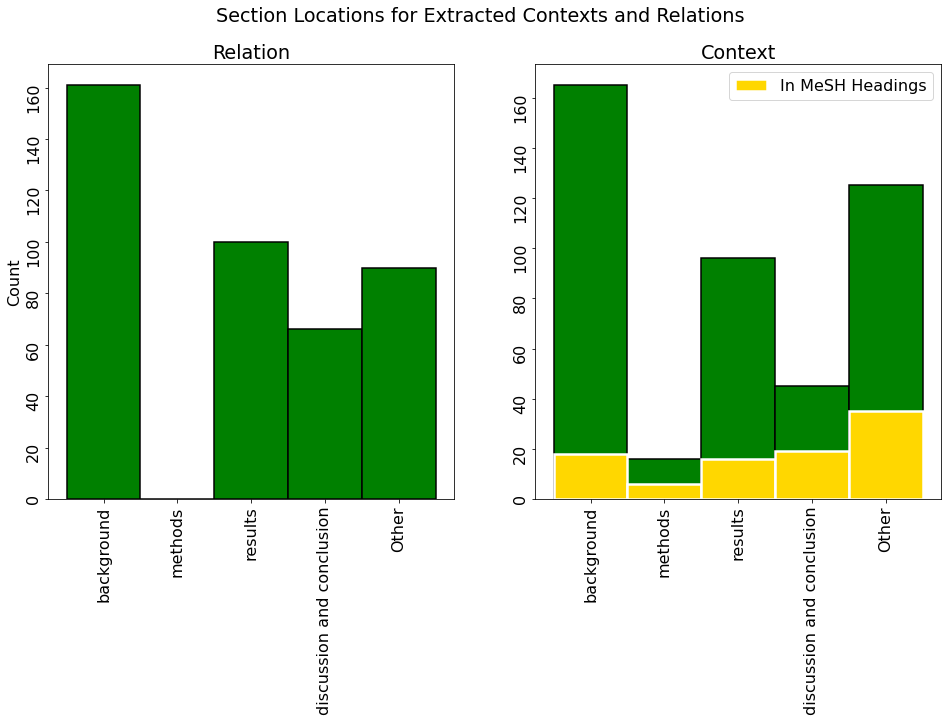

In [9]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# In MESH

fig, axs = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.suptitle("Section Locations for Extracted Contexts and Relations")

plt.rcParams.update({'font.size': 16})

my_order = ["background", "methods", "results", "discussion and conclusion", "Other"]

norm_rel_sec = list(ena_df.groupby(['rel']).sample(n=1)["norm_rel_sec"])
norm_rel_sec = ['Other' if v is None else v for v in norm_rel_sec]

ct = Counter(norm_rel_sec)
labels = my_order
values = [ct[k] for k in my_order]

axs[0].bar(np.arange(len(labels)), values, width=1, color="green", edgecolor='black', linewidth=1.5)
axs[0].set_title("Relation")
axs[0].tick_params(labelrotation=90)
axs[0].set_xticks(np.arange(len(labels))+0) 
axs[0].set_xticklabels(labels, fontsize=16)
axs[0].set_ylabel("Count")
    
    
norm_con_sec = list(ena_df.groupby(['con_sent']).sample(n=1)["norm_con_sec"])
norm_con_sec = ['Other' if v is None else v for v in norm_con_sec]
ct = Counter(norm_con_sec)
labels = my_order
values = [ct[k] for k in my_order]

con_mesh = list(ena_df[ena_df.con_in_mesh_headings == True].groupby(['con_sent']).sample(n=1)["norm_con_sec"])
con_mesh = ['Other' if v is None else v for v in con_mesh]
ct_mesh = Counter(con_mesh)
labels_mesh = my_order
values_mesh = [ct_mesh[k] for k in my_order]

axs[1].bar(np.arange(len(labels)), values, width=1, color="green", edgecolor='black', linewidth=1.5)
axs[1].bar(np.arange(len(labels_mesh)), values_mesh, width=1, color="gold", edgecolor='white', linewidth=2.5, label="In MeSH Headings")
axs[1].legend()
axs[1].set_title("Context")
axs[1].tick_params(labelrotation=90)
axs[1].set_xticks(np.arange(len(labels))+0) 
axs[1].set_xticklabels(labels, fontsize=16)
   
plt.show()

### Number of context mentions per paper

Text(0.04, 0.5, 'Count')

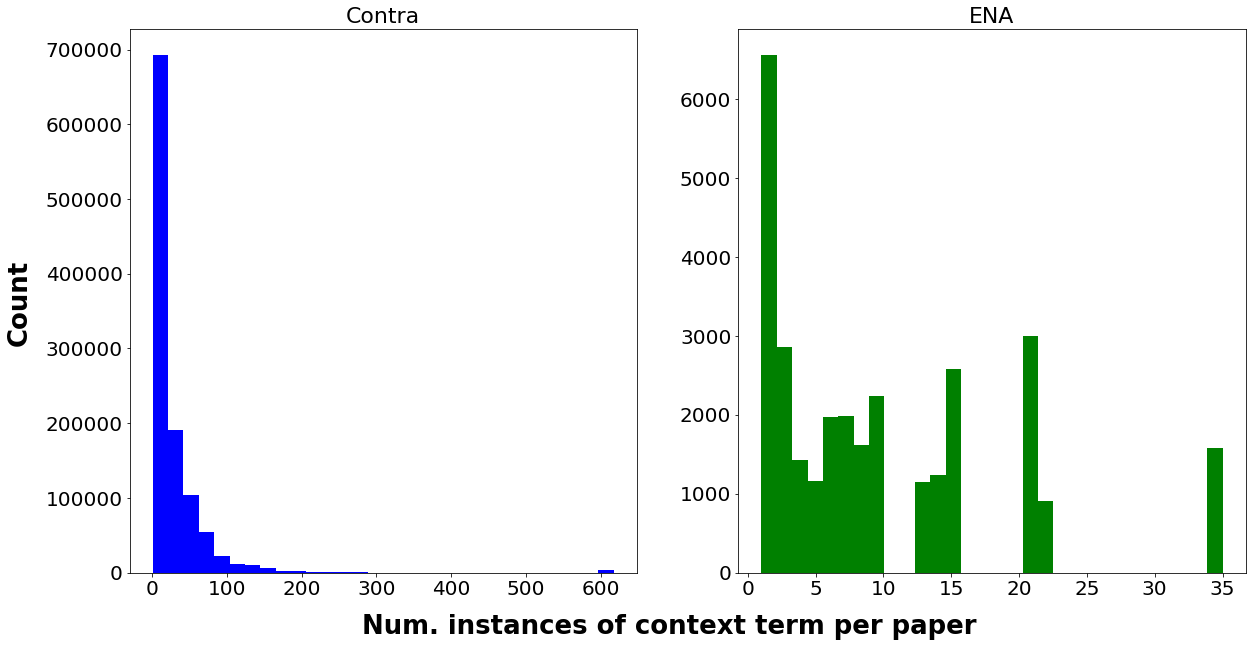

In [12]:
import matplotlib
import matplotlib.pyplot as plt

# Co-occurrences

plt.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,15))
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(list(contra_df.num_con_mentions), bins = 30, color="blue")
axs[0].set_title('Contra', fontsize=22)
axs[1].hist(list(ena_df.num_con_mentions), bins = 30, color="green")
axs[1].set_title('ENA', fontsize=22)

fig.text(0.5, 0.04, 'Num. instances of context term per paper', ha='center', fontsize=26, fontweight='bold')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=26, fontweight='bold')


### Relation-Context Classification

Now onto the classification of relation with context terms. Featurized representations of the papers in the ENA annotation corpus will be split and used as training/test sets.

Looking at clf: Logistic Reg
Accuracy 0.9730866274179983
Looking at clf: SVM - Linear


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.9730866274179983
Looking at clf: SVM - Gaussian


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.9730866274179983
Looking at clf: Random Forest


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.9742080179422484
Looking at clf: FeedForward Neural Net
Accuracy 0.9730866274179983
Looking at clf: Gradient Tree Boost


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.9744883655733109


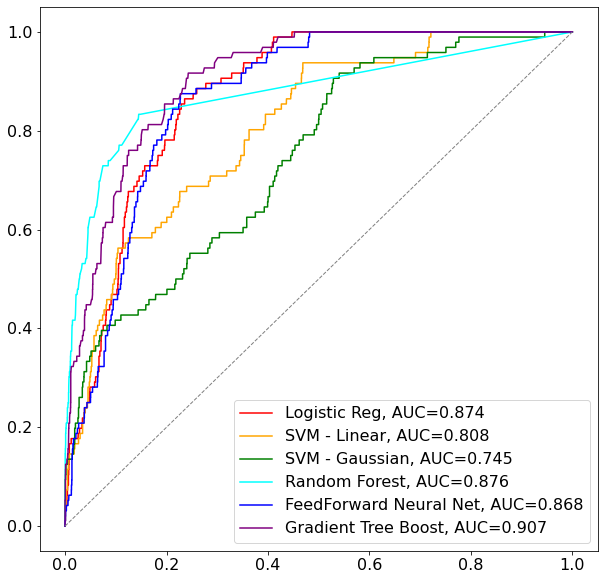

In [91]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})

model_contra_df = ena_df[['rel', 'con_sent', 'con', 'sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']].drop_duplicates().dropna()
model_contra_df.con_in_mesh_headings = model_contra_df.con_in_mesh_headings.astype(int)

df = pd.get_dummies(model_contra_df[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
X_train, X_test, y_train, y_test = train_test_split(df.drop(["annotation"], axis=1), df["annotation"], test_size=1.0/3, random_state=44)

#clf = SVC(kernel='linear')
#Log Reg
#SVM - Poly
#SVM - Linear
#SVM - Gaussian
#Random Forest
#FFNN
#Grad. Tree Boost

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         "orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    plt.legend(loc=4)    
    
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


In [47]:
df.head()

sent_dist  sec_dist  num_con_mentions  is_con_fp  \
814    45.0       11.0      15                False       
815    0.0        0.0       6                 False       
817    1.0        0.0       6                 False       
818    4.0        1.0       2                 False       
819    4.0        1.0       3                 False       
...    ...        ...      ..                   ...       
30223  10.0       5.0       1                 False       
30224  10.0       5.0       3                 False       
30225  11.0       5.0       21                False       
30226  25.0       7.0       7                 False       
30227  27.0       7.0       7                 False       

       is_closest_cont_by_sent  con_in_mesh_headings  annotation  \
814    False                    1                     False        
815    True                     0                     False        
817    False                    0                     False        
818    False                    0                     False        
819    False                    1                     False        
...      ...                   ..                       ...        
30223  True                     0                     True         
30224  True                     1                     True         
30225  False                    0                     True         
30226  False                    0                     True         
30227  False                    0                     True         

       norm_rel_sec_background  norm_rel_sec_discussion and conclusion  \
814    0                        0                                        
815    0                        0                                        
817    0                        0                                        
818    0                        0                                        
819    0                        0                                        
...   ..                       ..                                        
30223  0                        1                                        
30224  0                        1                                        
30225  0                        1                                        
30226  0                        1                                        
30227  0                        1                                        

       norm_rel_sec_results  norm_con_sec_background  \
814    1                     0                         
815    1                     0                         
817    1                     0                         
818    1                     0                         
819    1                     0                         
...   ..                    ..                         
30223  0                     0                         
30224  0                     0                         
30225  0                     0                         
30226  0                     0                         
30227  0                     0                         

       norm_con_sec_discussion and conclusion  norm_con_sec_methods  \
814    0                                       1                      
815    0                                       0                      
817    0                                       0                      
818    0                                       0                      
819    0                                       0                      
...   ..                                      ..                      
30223  0                                       1                      
30224  0                                       1                      
30225  0                                       1                      
30226  0                                       1                      
30227  0                                       1                      

       norm_con_sec_results  
814    0                     
815   

Looking at clf: Logistic Reg
Accuracy 0.9730866274179983
Logistic Reg
[[3471    0]
 [  96    0]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 720x720 with 0 Axes>

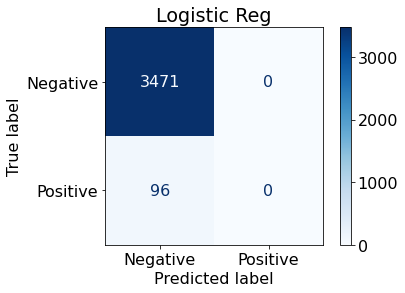

Looking at clf: SVM - Linear
Accuracy 0.9730866274179983
SVM - Linear
[[3471    0]
 [  96    0]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


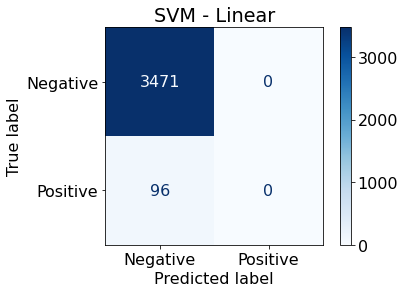

Looking at clf: SVM - Gaussian
Accuracy 0.9730866274179983
SVM - Gaussian
[[3471    0]
 [  96    0]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


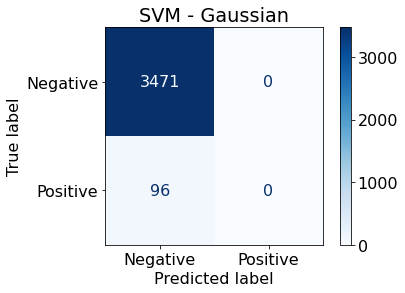

Looking at clf: Random Forest
Accuracy 0.9742080179422484
Random Forest
[[3452   19]
 [  73   23]]


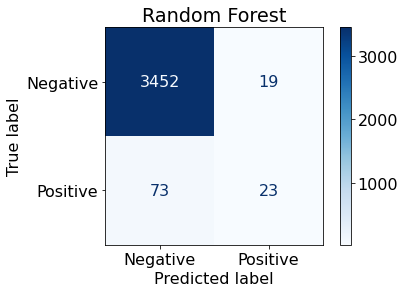

Looking at clf: FeedForward Neural Net
Accuracy 0.9730866274179983
FeedForward Neural Net
[[3471    0]
 [  96    0]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


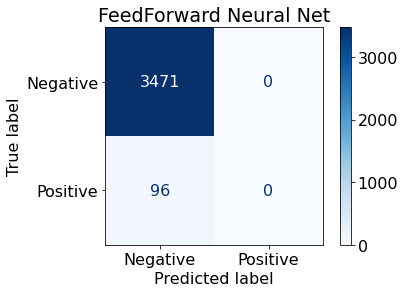

Looking at clf: Gradient Tree Boost
Accuracy 0.9744883655733109
Gradient Tree Boost
[[3469    2]
 [  89    7]]


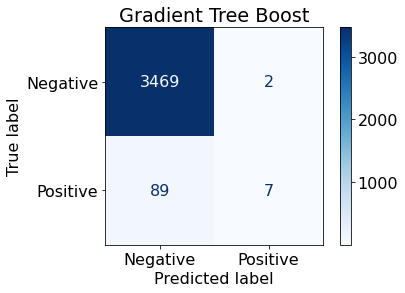

In [39]:
from sklearn.metrics import plot_confusion_matrix


fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         "orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["Negative", "Positive"],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(labels[i])

    print(labels[i])
    print(disp.confusion_matrix)

    plt.show()
    #plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    #plt.legend(loc=4)    
    
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


In [38]:
X_train.columns

Index(['sent_dist', 'sec_dist', 'num_con_mentions', 'is_con_fp',
       'is_closest_cont_by_sent', 'con_in_mesh_headings',
       'norm_rel_sec_background', 'norm_rel_sec_discussion and conclusion',
       'norm_rel_sec_results', 'norm_con_sec_background',
       'norm_con_sec_discussion and conclusion', 'norm_con_sec_methods',
       'norm_con_sec_results'],
      dtype='object')

### Feature Importance Analysis

##### Logistic Regression Coefficients

Accuracy 0.9730866274179983
Feature sent_dist, Score: 0.021217121001898397
Feature sec_dist, Score: -0.08166781441601897
Feature num_con_mentions, Score: -0.008854304376418697
Feature is_con_fp, Score: 0.008531033911570061
Feature is_closest_cont_by_sent, Score: 0.38163809413099226
Feature con_in_mesh_headings, Score: -0.04716707980209075
Feature norm_rel_sec_background, Score: -1.1267189485836713
Feature norm_rel_sec_discussion and conclusion, Score: 1.3758613718661032
Feature norm_rel_sec_results, Score: -3.157679484087289
Feature norm_con_sec_background, Score: -0.621017426816495
Feature norm_con_sec_discussion and conclusion, Score: -1.1018997702337217
Feature norm_con_sec_methods, Score: -0.6364748511987395
Feature norm_con_sec_results, Score: -0.5491450125558143


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


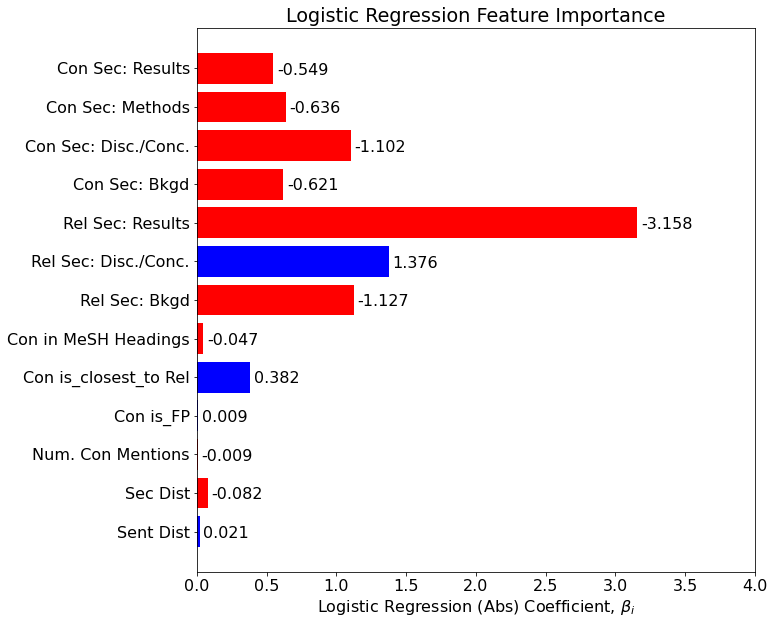

In [41]:
import matplotlib.pyplot as plt
import numpy as np

col_names_short = ["Sent Dist", "Sec Dist", "Num. Con Mentions", "Con is_FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Results", "Con Sec: Bkgd", "Con Sec: Disc./Conc.", "Con Sec: Methods", "Con Sec: Results"]
fig = plt.figure(figsize=(10, 10))

log_reg = LogisticRegression(penalty='l2', random_state=44, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = log_reg.coef_.flatten()
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.025, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 4)
plt.xlabel("Logistic Regression (Abs) Coefficient, $\\beta_i$")
plt.title("Logistic Regression Feature Importance")
plt.show()
          
          



Accuracy 0.9742080179422484
Feature sent_dist, Score: 0.519521570658049
Feature sec_dist, Score: 0.24484284278065702
Feature num_con_mentions, Score: 0.1294113368449033
Feature is_con_fp, Score: 0.01659210570261808
Feature is_closest_cont_by_sent, Score: 0.00357863654595904
Feature con_in_mesh_headings, Score: 0.015341737983046068
Feature norm_rel_sec_background, Score: 0.005653581028522355
Feature norm_rel_sec_discussion and conclusion, Score: 0.03179221674596548
Feature norm_rel_sec_results, Score: 0.012463159738362393
Feature norm_con_sec_background, Score: 0.004493042883597028
Feature norm_con_sec_discussion and conclusion, Score: 0.005727416918527983
Feature norm_con_sec_methods, Score: 0.004192819672021624
Feature norm_con_sec_results, Score: 0.006389532497770595


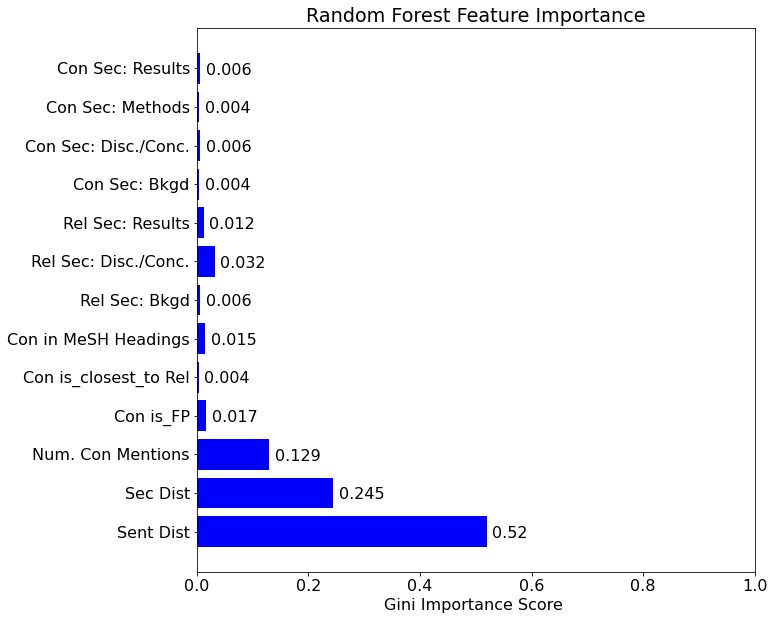

In [42]:
import matplotlib.pyplot as plt
import numpy as np

col_names_short = ["Sent Dist", "Sec Dist", "Num. Con Mentions", "Con is_FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Results", "Con Sec: Bkgd", "Con Sec: Disc./Conc.", "Con Sec: Methods", "Con Sec: Results"]
fig = plt.figure(figsize=(10, 10))

rand_forest = RandomForestClassifier(random_state=44)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = rand_forest.feature_importances_
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.01, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 1)
plt.xlabel("Gini Importance Score ")
plt.title("Random Forest Feature Importance")
plt.show()
          
          



##### Permutation Feature Importance -- Gradient Boosted Trees

Accuracy 0.9744883655733109
Feature sent_dist, Score: 0.20224309600889684
Feature sec_dist, Score: 0.18842001892626287
Feature num_con_mentions, Score: 0.0008972384035587311
Feature is_con_fp, Score: 0.0
Feature is_closest_cont_by_sent, Score: 5.607753992080689e-05
Feature con_in_mesh_headings, Score: 0.0001682322472333908
Feature norm_rel_sec_background, Score: -0.0001401938498020172
Feature norm_rel_sec_discussion and conclusion, Score: 0.003476797789335251
Feature norm_rel_sec_results, Score: -5.607753992080689e-05
Feature norm_con_sec_background, Score: 0.00042058005928993227
Feature norm_con_sec_discussion and conclusion, Score: -8.411630988121032e-05
Feature norm_con_sec_methods, Score: -2.8038769960403444e-05
Feature norm_con_sec_results, Score: -0.0001401938498020172


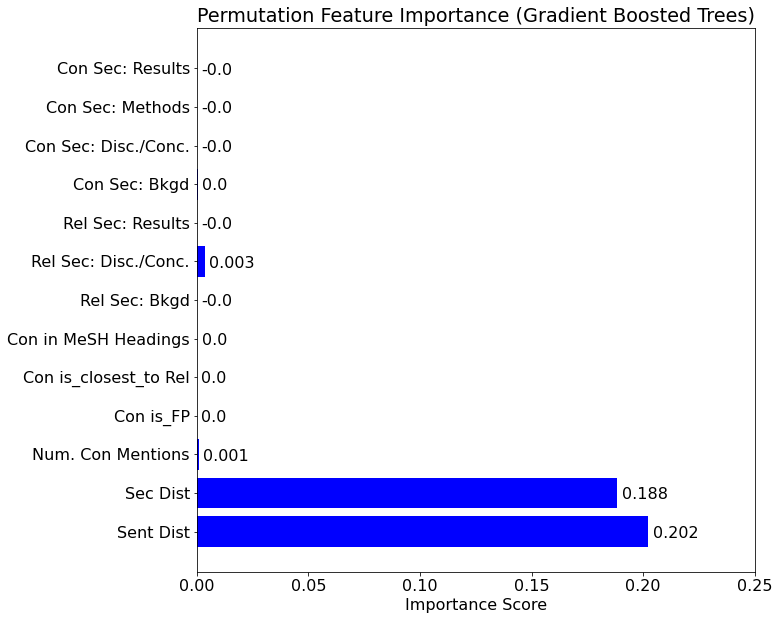

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance


fig = plt.figure(figsize=(10, 10))

gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

results = permutation_importance(gbc, X_train.astype(np.float32), y_train.astype(np.float32), scoring='neg_mean_squared_error', random_state=44)
importance = results.importances_mean
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.002, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 0.25)
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance (Gradient Boosted Trees)")
plt.show()
          
          



#### Balanced

Now let's do the same analyses but trying to compensate for class imbalance

Looking at clf: Logistic Reg
Accuracy 0.711802635267732
Looking at clf: SVM - Linear
Accuracy 0.7636669470142977
Looking at clf: SVM - Gaussian
Accuracy 0.6773198766470423
Looking at clf: Random Forest
Accuracy 0.9694421082141856
Looking at clf: FeedForward Neural Net
Accuracy 0.9730866274179983
Looking at clf: Gradient Tree Boost


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.9744883655733109


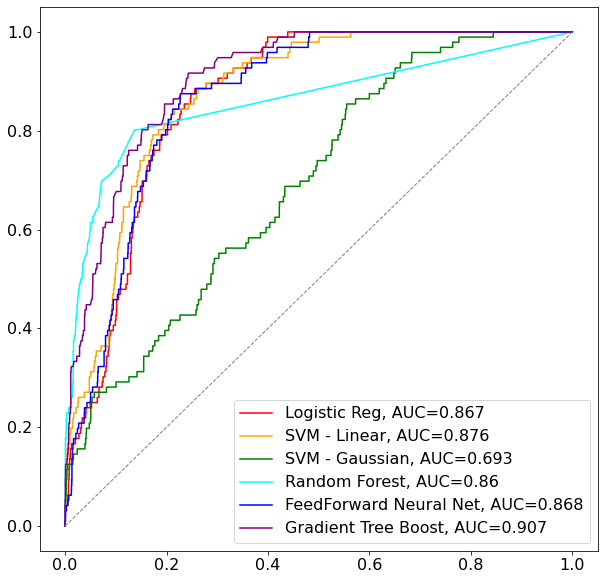

In [44]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})

#clf = SVC(kernel='linear')
#Log Reg
#SVM - Poly
#SVM - Linear
#SVM - Gaussian
#Random Forest
#FFNN
#Grad. Tree Boost

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear', class_weight='balanced'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True, class_weight='balanced'),
            SVC(kernel='rbf', random_state=44, probability=True, class_weight='balanced'),
            RandomForestClassifier(random_state=44, class_weight='balanced'),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         "orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    plt.legend(loc=4)    
    
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


Looking at clf: Logistic Reg
Accuracy 0.711802635267732
Logistic Reg
[[2453 1018]
 [  10   86]]


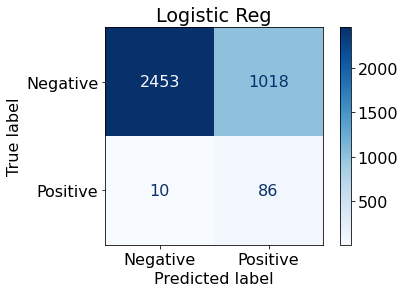

Looking at clf: SVM - Linear
Accuracy 0.7636669470142977
SVM - Linear
[[2643  828]
 [  15   81]]


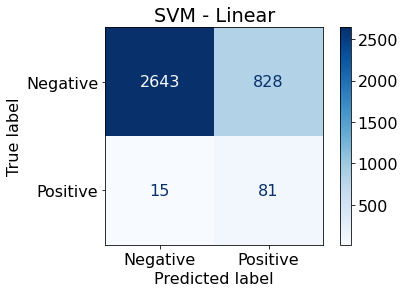

Looking at clf: SVM - Gaussian
Accuracy 0.6773198766470423
SVM - Gaussian
[[2362 1109]
 [  42   54]]


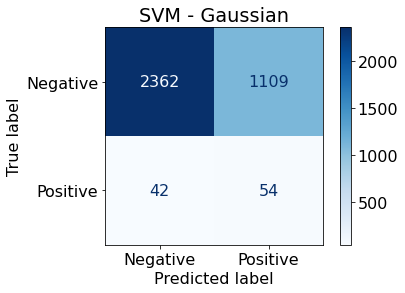

Looking at clf: Random Forest
Accuracy 0.9694421082141856
Random Forest
[[3435   36]
 [  73   23]]


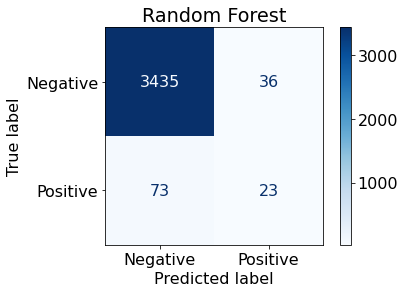

Looking at clf: FeedForward Neural Net
Accuracy 0.9730866274179983
FeedForward Neural Net
[[3471    0]
 [  96    0]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


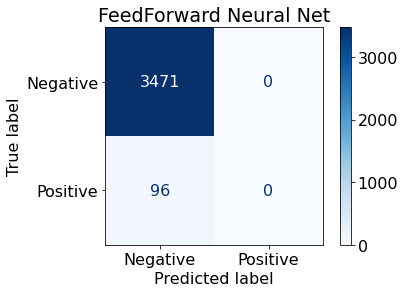

Looking at clf: Gradient Tree Boost
Accuracy 0.9744883655733109
Gradient Tree Boost
[[3469    2]
 [  89    7]]


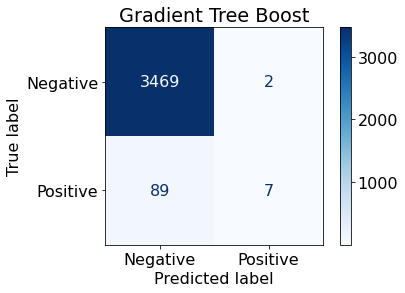

In [45]:
clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear', class_weight='balanced'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True, class_weight='balanced'),
            SVC(kernel='rbf', random_state=44, probability=True, class_weight='balanced'),
            RandomForestClassifier(random_state=44, class_weight='balanced'),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         #"orange",
         "yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["Negative", "Positive"],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(labels[i])

    print(labels[i])
    print(disp.confusion_matrix)

    plt.show()
    #plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    #plt.legend(loc=4)    
    
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


Accuracy 0.711802635267732
Feature sent_dist, Score: 0.021605033051360262
Feature sec_dist, Score: -0.09737652258719855
Feature num_con_mentions, Score: -0.010879211056932288
Feature is_con_fp, Score: -0.11476924493579331
Feature is_closest_cont_by_sent, Score: 0.21707216355036882
Feature con_in_mesh_headings, Score: 0.00226569925225982
Feature norm_rel_sec_background, Score: -0.14008972262017913
Feature norm_rel_sec_discussion and conclusion, Score: 3.1475611143039854
Feature norm_rel_sec_results, Score: -4.155561123142513
Feature norm_con_sec_background, Score: 0.36288330187319184
Feature norm_con_sec_discussion and conclusion, Score: -1.0347787222176836
Feature norm_con_sec_methods, Score: -0.3058154902612907
Feature norm_con_sec_results, Score: -0.17037882085225717


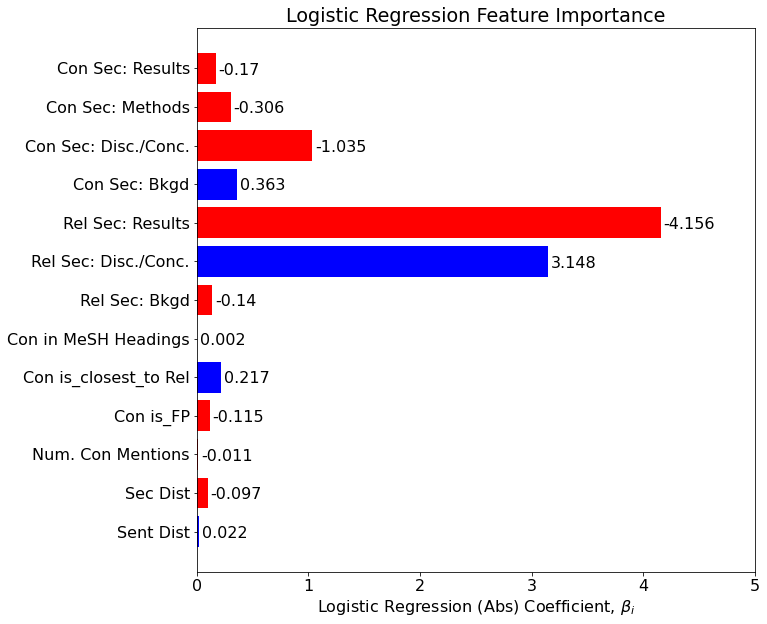

Accuracy 0.9694421082141856
Feature sent_dist, Score: 0.2884419857341237
Feature sec_dist, Score: 0.181156760979523
Feature num_con_mentions, Score: 0.0969579232838402
Feature is_con_fp, Score: 0.013937076961433849
Feature is_closest_cont_by_sent, Score: 0.006650621035349371
Feature con_in_mesh_headings, Score: 0.01276400881506147
Feature norm_rel_sec_background, Score: 0.03214570150039422
Feature norm_rel_sec_discussion and conclusion, Score: 0.20355875903007212
Feature norm_rel_sec_results, Score: 0.11806991244975852
Feature norm_con_sec_background, Score: 0.01796956863120891
Feature norm_con_sec_discussion and conclusion, Score: 0.009543618154486792
Feature norm_con_sec_methods, Score: 0.004535984580949184
Feature norm_con_sec_results, Score: 0.014268078843798639


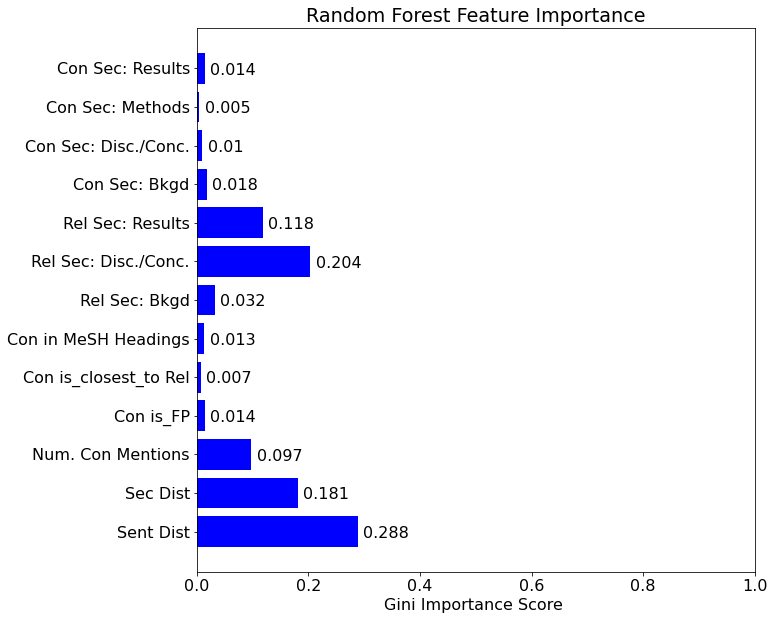

Feature sent_dist, Score: 0.03745969384908676
Feature sec_dist, Score: 0.022318800166249275
Feature num_con_mentions, Score: 0.017832609266042708
Feature is_con_fp, Score: 0.006841441430151462
Feature is_closest_cont_by_sent, Score: -0.00014019329100847244
Feature con_in_mesh_headings, Score: 0.005804009549319744
Feature norm_rel_sec_background, Score: 0.004906771518290043
Feature norm_rel_sec_discussion and conclusion, Score: 0.013991308212280274
Feature norm_rel_sec_results, Score: 0.007121828198432922
Feature norm_con_sec_background, Score: 0.005439506843686104
Feature norm_con_sec_discussion and conclusion, Score: 0.004177765175700188
Feature norm_con_sec_methods, Score: 0.0018225152045488358
Feature norm_con_sec_results, Score: 0.00846768580377102


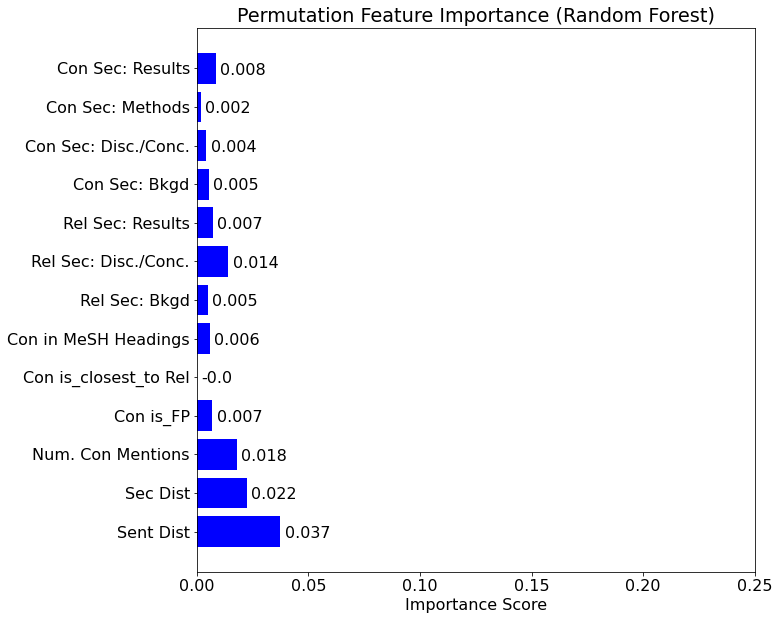

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))

log_reg = LogisticRegression(penalty='l2', random_state=44, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = log_reg.coef_.flatten()
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.025, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 5)
plt.xlabel("Logistic Regression (Abs) Coefficient, $\\beta_i$")
plt.title("Logistic Regression Feature Importance")
plt.show()
          
          


fig = plt.figure(figsize=(10, 10))

rand_forest = RandomForestClassifier(random_state=44, class_weight='balanced')
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = rand_forest.feature_importances_
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.01, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 1)
plt.xlabel("Gini Importance Score ")
plt.title("Random Forest Feature Importance")
plt.show()
          



fig = plt.figure(figsize=(10, 10))

results = permutation_importance(rand_forest, X_train.astype(np.float32), y_train.astype(np.float32), scoring='neg_mean_squared_error', random_state=44)
importance = results.importances_mean
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.002, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 0.25)
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance (Random Forest)")
plt.show()
          
          





#### Downsampling majority class

Same analyses but this time with downsampled negatives

Looking at clf: Logistic Reg
Accuracy 0.7889447236180904
Looking at clf: SVM - Linear
Accuracy 0.7889447236180904
Looking at clf: SVM - Gaussian
Accuracy 0.5025125628140703
Looking at clf: Random Forest
Accuracy 0.7688442211055276
Looking at clf: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy 0.7839195979899497
Looking at clf: Gradient Tree Boost
Accuracy 0.7638190954773869


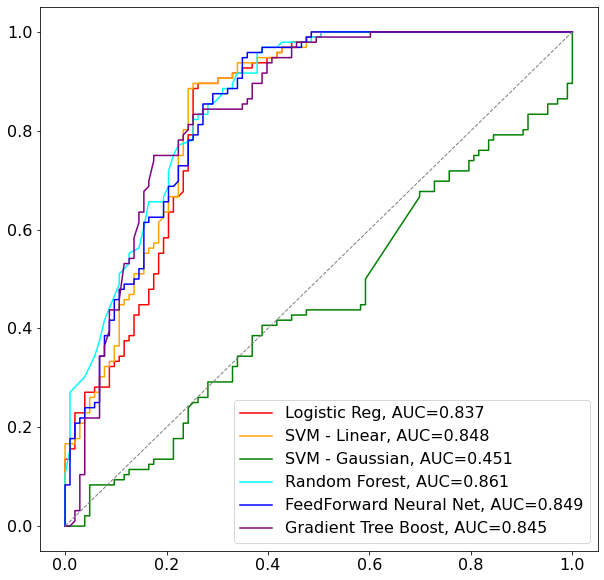

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})



# Upsampling procedure
mc_df_maj = model_contra_df[model_contra_df.annotation==False]
mc_df_min = model_contra_df[model_contra_df.annotation==True]
#mc_df_min_up = resample(mc_df_min, replace=True, n_samples=len(mc_df_maj), random_state=44)
mc_df_maj_down = resample(mc_df_maj, replace=False, n_samples=len(mc_df_min), random_state=44)
#mc_df_up = pd.concat([mc_df_maj, mc_df_min_up])
mc_df_down = pd.concat([mc_df_maj_down, mc_df_min])
mc_df_down.con_in_mesh_headings = mc_df_down.con_in_mesh_headings.astype(int)

#df = pd.get_dummies(mc_df_up[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
df = pd.get_dummies(mc_df_down[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
X_train, X_test, y_train, y_test = train_test_split(df.drop(["annotation"], axis=1), df["annotation"], test_size=1.0/3, random_state=44)

#clf = SVC(kernel='linear')
#Log Reg
#SVM - Poly
#SVM - Linear
#SVM - Gaussian
#Random Forest
#FFNN
#Grad. Tree Boost

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         "orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    plt.legend(loc=4)    
    
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


In [49]:
clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            #SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          #"SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         #"orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["Negative", "Positive"],
                                 cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title(labels[i])

    print(labels[i])
    print(disp.confusion_matrix)

    plt.show()
    #plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    #plt.legend(loc=4)    
    
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


Looking at clf: Logistic Reg
Accuracy 0.7889447236180904


NameError: name 'plot_confusion_matrix' is not defined

In [54]:
col_names_short

['Sent Dist',
 'Sec Dist',
 'Num. Con Mentions',
 'Con is_FP',
 'Con is_closest_to Rel',
 'Rel Sec: Bkgd',
 'Rel Sec: Disc./Conc.',
 'Rel Sec: Results',
 'Con Sec: Bkgd',
 'Con Sec: Disc./Conc.',
 'Con Sec: Methods',
 'Con Sec: Results']

Accuracy 0.7889447236180904
Feature sent_dist, Score: 0.021897049739119854
Feature sec_dist, Score: -0.09792472262241642
Feature num_con_mentions, Score: -0.011293313881640834
Feature is_con_fp, Score: 0.14374812895030625
Feature is_closest_cont_by_sent, Score: -0.3582601134521616
Feature con_in_mesh_headings, Score: 0.2590738614333734
Feature norm_rel_sec_background, Score: -0.5297277413018436
Feature norm_rel_sec_discussion and conclusion, Score: 2.480782718448236
Feature norm_rel_sec_results, Score: -2.5328546325737142
Feature norm_con_sec_background, Score: 0.32080298907482957
Feature norm_con_sec_discussion and conclusion, Score: -0.5008335204886574
Feature norm_con_sec_methods, Score: -0.23599113131400504
Feature norm_con_sec_results, Score: -0.16577799269948706


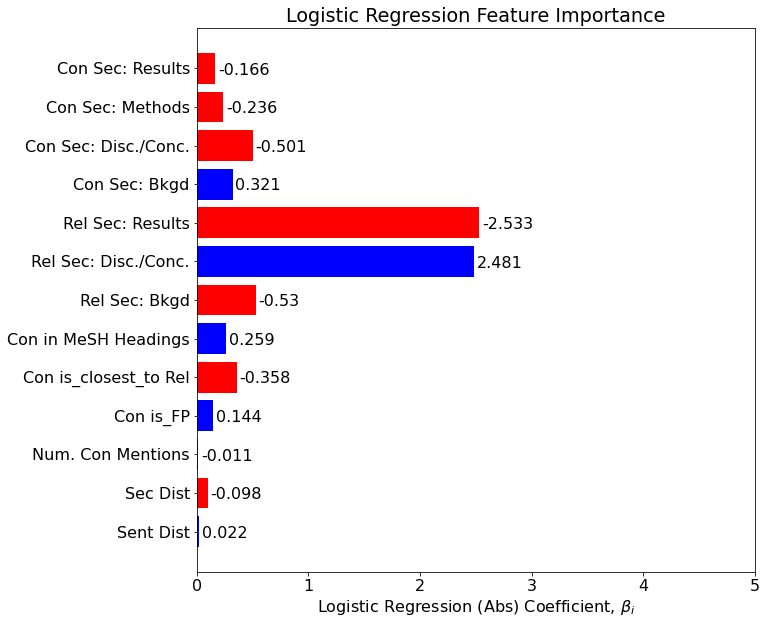

Accuracy 0.7688442211055276
Feature sent_dist, Score: 0.24045522721129595
Feature sec_dist, Score: 0.1813316361054571
Feature num_con_mentions, Score: 0.10119734516559499
Feature is_con_fp, Score: 0.013472715356927187
Feature is_closest_cont_by_sent, Score: 0.005688510881515563
Feature con_in_mesh_headings, Score: 0.014823367596047419
Feature norm_rel_sec_background, Score: 0.04133199029198934
Feature norm_rel_sec_discussion and conclusion, Score: 0.20038960082756005
Feature norm_rel_sec_results, Score: 0.1452222497264234
Feature norm_con_sec_background, Score: 0.024709273932711034
Feature norm_con_sec_discussion and conclusion, Score: 0.010339922058344943
Feature norm_con_sec_methods, Score: 0.004861104184883886
Feature norm_con_sec_results, Score: 0.016177056661249085


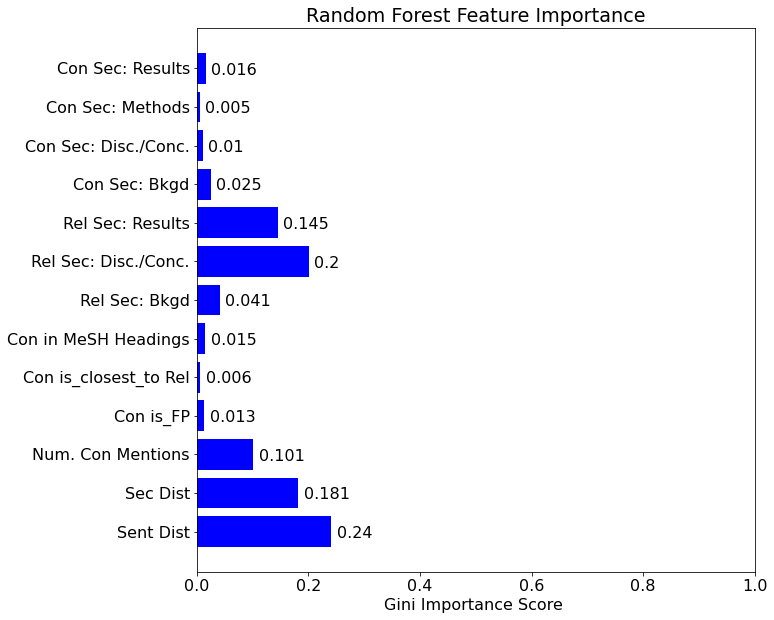

Feature sent_dist, Score: 0.1486146032810211
Feature sec_dist, Score: 0.15214105248451232
Feature num_con_mentions, Score: 0.027707806229591368
Feature is_con_fp, Score: 0.004533998668193817
Feature is_closest_cont_by_sent, Score: 0.001007552444934845
Feature con_in_mesh_headings, Score: -0.0010075569152832031
Feature norm_rel_sec_background, Score: 0.0035264432430267335
Feature norm_rel_sec_discussion and conclusion, Score: 0.26397983729839325
Feature norm_rel_sec_results, Score: 0.038287150859832766
Feature norm_con_sec_background, Score: 0.038790926337242126
Feature norm_con_sec_discussion and conclusion, Score: 0.003022664785385132
Feature norm_con_sec_methods, Score: 0.0
Feature norm_con_sec_results, Score: 0.0035264432430267335


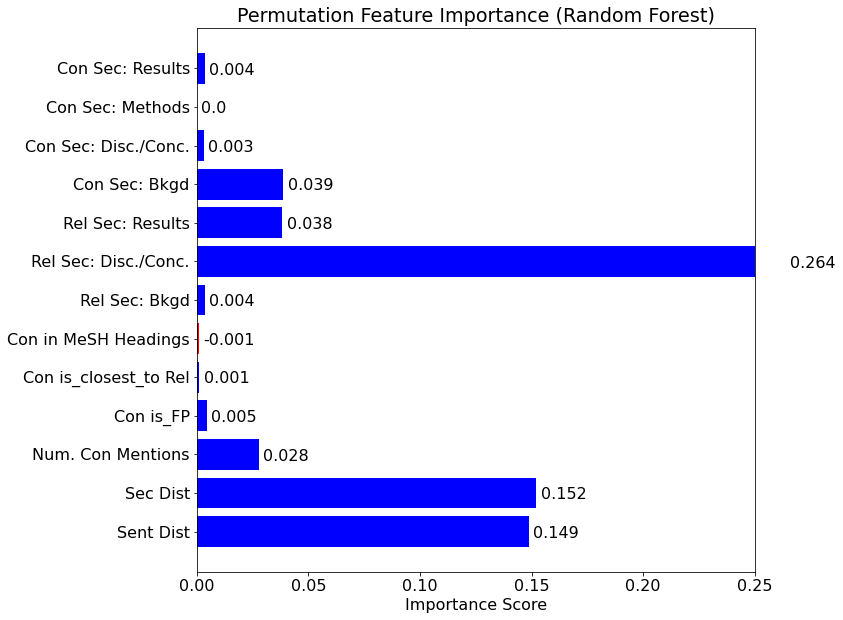

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance


fig = plt.figure(figsize=(10, 10))

col_names_short = ["Sent Dist", "Sec Dist", "Num. Con Mentions", "Con is_FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Results", "Con Sec: Bkgd", "Con Sec: Disc./Conc.", "Con Sec: Methods", "Con Sec: Results"]

log_reg = LogisticRegression(penalty='l2', random_state=44, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = log_reg.coef_.flatten()
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.025, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 5)
plt.xlabel("Logistic Regression (Abs) Coefficient, $\\beta_i$")
plt.title("Logistic Regression Feature Importance")
plt.show()
          
          


fig = plt.figure(figsize=(10, 10))

rand_forest = RandomForestClassifier(random_state=44)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = rand_forest.feature_importances_
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.01, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 1)
plt.xlabel("Gini Importance Score ")
plt.title("Random Forest Feature Importance")
plt.show()
          



fig = plt.figure(figsize=(10, 10))

gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train, y_train)

results = permutation_importance(gbc, X_train.astype(np.float32), y_train.astype(np.float32), scoring='neg_mean_squared_error', random_state=44)
importance = results.importances_mean
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.002, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 0.25)
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance (Random Forest)")
plt.show()
          
          





## Let's try the grouping method

Here we group contexts at the "concept" level and aggregate features accordingly

In [20]:
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"
ena_df = pd.read_csv(ena_df_path)

ena_df_grp = ena_df.groupby(['rel', 'con'])

xx = ena_df.assign(min_sent_dist=ena_df_grp['sent_dist'].transform(min),
                   min_sec_dist=ena_df_grp['sec_dist'].transform(min),
                   any_con_fp=ena_df_grp['is_con_fp'].transform(max),
                   any_rel_disc_conc=ena_df_grp['norm_rel_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_rel_background=ena_df_grp['norm_rel_sec'].transform(lambda x: x.eq('background').any()),
                   any_rel_methods=ena_df_grp['norm_rel_sec'].transform(lambda x: x.eq('methods').any()),
                   any_rel_results=ena_df_grp['norm_rel_sec'].transform(lambda x: x.eq('results').any()),
                   any_con_disc_conc=ena_df_grp['norm_con_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_con_background=ena_df_grp['norm_con_sec'].transform(lambda x: x.eq('background').any()),
                   any_con_methods=ena_df_grp['norm_con_sec'].transform(lambda x: x.eq('methods').any()),
                   any_con_results=ena_df_grp['norm_con_sec'].transform(lambda x: x.eq('results').any()),)

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})

model_contra_df = ena_df[['rel', 'con_sent', 'con', 'sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']].drop_duplicates().dropna()
model_contra_df.con_in_mesh_headings = model_contra_df.con_in_mesh_headings.astype(int)

df = pd.get_dummies(model_contra_df[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
X_train, X_test, y_train, y_test = train_test_split(df.drop(["annotation"], axis=1), df["annotation"], test_size=1.0/3, random_state=44)


In [37]:
len(df[df.annotation == False])

115

Looking at clf: Logistic Reg
Accuracy 0.7012987012987013
Looking at clf: SVM - Linear
Accuracy 0.6883116883116883
Looking at clf: SVM - Gaussian
Accuracy 0.4155844155844156
Looking at clf: Random Forest
Accuracy 0.7272727272727273
Looking at clf: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy 0.7142857142857143
Looking at clf: Gradient Tree Boost
Accuracy 0.7402597402597403


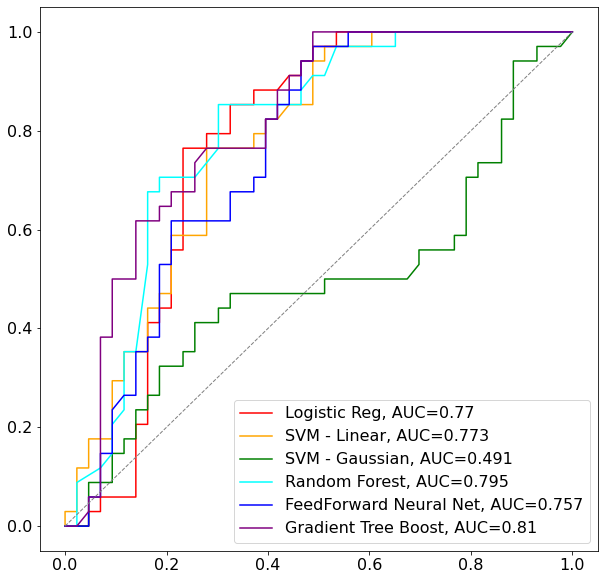

In [73]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})

model_contra_grp_df = xx[['rel', 'con', 'min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc', 'annotation']].drop_duplicates().dropna()
model_contra_grp_df.con_in_mesh_headings = model_contra_grp_df.con_in_mesh_headings.astype(int)

# Upsampling procedure
mc_df_maj = model_contra_grp_df[model_contra_grp_df.annotation==False]
mc_df_min = model_contra_grp_df[model_contra_grp_df.annotation==True]
#mc_df_min_up = resample(mc_df_min, replace=True, n_samples=len(mc_df_maj), random_state=44)
mc_df_maj_down = resample(mc_df_maj, replace=False, n_samples=len(mc_df_min), random_state=44)
#mc_df_up = pd.concat([mc_df_maj, mc_df_min_up])
mc_df_down = pd.concat([mc_df_maj_down, mc_df_min])
mc_df_down.con_in_mesh_headings = mc_df_down.con_in_mesh_headings.astype(int)

#df = pd.get_dummies(mc_df_up[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
df = pd.get_dummies(mc_df_down[['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc', 'annotation']])
X_train, X_test, y_train, y_test = train_test_split(df.drop(["annotation"], axis=1), df["annotation"], test_size=1.0/3, random_state=44)

#clf = SVC(kernel='linear')
#Log Reg
#SVM - Poly
#SVM - Linear
#SVM - Gaussian
#Random Forest
#FFNN
#Grad. Tree Boost

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          "SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         "orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    plt.legend(loc=4)    
    
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


In [25]:
model_contra_grp_df.drop_duplicates().dropna()

rel  \
795    One complementation group , named warthog ( wr...   
796    One complementation group , named warthog ( wr...   
798    One complementation group , named warthog ( wr...   
799    One complementation group , named warthog ( wr...   
802    One complementation group , named warthog ( wr...   
...                                                  ...   
30208  We further demonstrated that the Gab1 and Shp2...   
30222  We further demonstrated that the Gab1 and Shp2...   
30223  We further demonstrated that the Gab1 and Shp2...   
30224  We further demonstrated that the Gab1 and Shp2...   
30226  We further demonstrated that the Gab1 and Shp2...   

                         con  min_sent_dist  min_sec_dist  num_con_mentions  \
795               drosophila           18.0           4.0                15   
796                    yeast           28.0           6.0                 6   
798                scutellum           89.0          22.0                 2   
799                 vesicles           84.0          21.0                 3   
802                membranes           81.0          21.0                 2   
...                      ...            ...           ...               ...   
30208                   mefs           11.0           3.0                21   
30222                  mouse           10.0           5.0                 3   
30223  embryonic fibroblasts           10.0           5.0                 1   
30224            fibroblasts           10.0           5.0                 3   
30226              membranes           25.0           7.0                 7   

       any_con_fp  is_closest_cont_by_sent  con_in_mesh_headings  \
795          True                    False                     1   
796         False                    False                     0   
798         False                    False                     0   
799         False                    False                     0   
802         False                    False                     0   
...           ...                      ...                   ...   
30208        True                    False                     0   
30222        True                     True                     0   
30223       False                     True                     0   
30224        True                     True                     1   
30226       False                    False                     0   

                    norm_rel_sec  any_con_background  any_con_methods  \
795                      results               False             True   
796                      results               False            False   
798                      results               False            False   
799                      results               False            False   
802                      results               False            False   
...                          ...                 ...              ...   
30208  discussion and conclusion               False             True   
30222  discussion and conclusion                True             True   
30223  discussion and conclusion               False             True   
30224  discussion and conclusion                True             True   
30226  discussion and conclusion               False             True   

       any_con_results  any_con_disc_conc  annotation  
795               True              False       False  
796               True              False       False  
798              False              False       False  
799              False              False       False  
802              False              False       False  
...                ...                ...         ...  
30208             True              False        True  
30222             True              False        True  
30223            False              False        True  
30224             True              False        True  
30226            False              False        True  

[3788 rows x 14 

Looking at clf: Logistic Reg
Accuracy 0.7012987012987013
Logistic Reg
[[22 21]
 [ 2 32]]


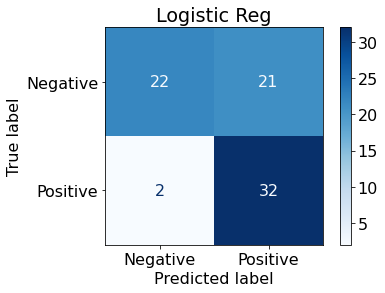

Looking at clf: SVM - Gaussian
Accuracy 0.4155844155844156
SVM - Gaussian
[[ 7 36]
 [ 9 25]]


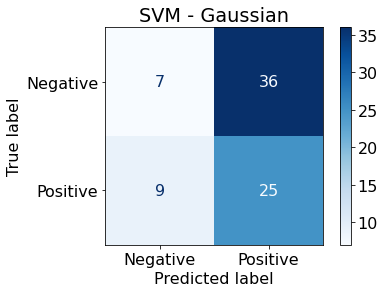

Looking at clf: Random Forest
Accuracy 0.7272727272727273
Random Forest
[[31 12]
 [ 9 25]]


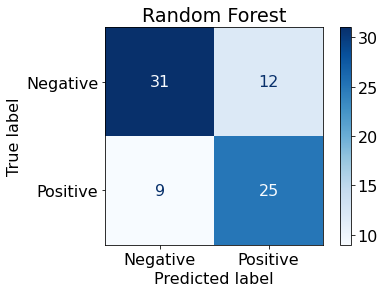

Looking at clf: FeedForward Neural Net
Accuracy 0.7142857142857143
FeedForward Neural Net
[[22 21]
 [ 1 33]]


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


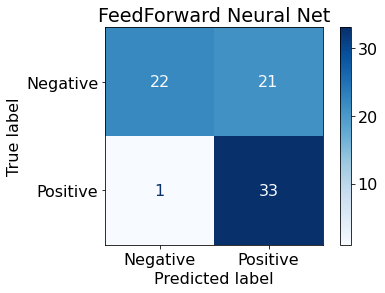

Looking at clf: Gradient Tree Boost
Accuracy 0.7402597402597403
Gradient Tree Boost
[[31 12]
 [ 8 26]]


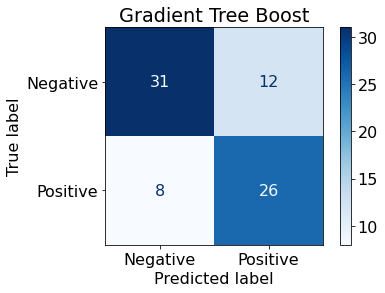

In [74]:
from sklearn.metrics import plot_confusion_matrix

clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
            #SVC(kernel='poly', random_state=44),
            #SVC(kernel='linear', random_state=44, probability=True),
            SVC(kernel='rbf', random_state=44, probability=True),
            RandomForestClassifier(random_state=44),
            MLPClassifier(random_state=44),
            GradientBoostingClassifier(random_state=44)]
labels = ["Logistic Reg", 
          #"SVM - Poly", 
          #"SVM - Linear", 
          "SVM - Gaussian",
          "Random Forest",
          "FeedForward Neural Net",
          "Gradient Tree Boost"]
colors = ["red",
         #"orange",
         #"yellow",
         "green",
         "cyan",
         "blue",
         "purple"]

precs = []
recs = []
fs = []
for i, clf in enumerate(clf_list):
    print(f"Looking at clf: {labels[i]}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))
    prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)
    precs.append(prec)
    recs.append(rec)
    fs.append(f)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["Negative", "Positive"],
                                 cmap=plt.cm.Blues, normalize=None)
    disp.ax_.set_title(labels[i])

    print(labels[i])
    print(disp.confusion_matrix)

    plt.show()
    #plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
    #plt.legend(loc=4)    
    
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.show()


Accuracy 0.7012987012987013
Feature min_sent_dist, Score: 0.026190709927273934
Feature min_sec_dist, Score: -0.09260354084927652
Feature num_con_mentions, Score: 0.023320677153223505
Feature any_con_fp, Score: -0.24346987391965336
Feature is_closest_cont_by_sent, Score: -0.4510835955298228
Feature con_in_mesh_headings, Score: 0.1688589413516257
Feature any_con_background, Score: -0.08150647283919896
Feature any_con_methods, Score: -0.09673581633698917
Feature any_con_results, Score: 0.5133609138427991
Feature any_con_disc_conc, Score: 0.0
Feature norm_rel_sec_background, Score: -0.1751501512871193
Feature norm_rel_sec_discussion and conclusion, Score: 1.4656018007032094
Feature norm_rel_sec_results, Score: -2.094241659008559


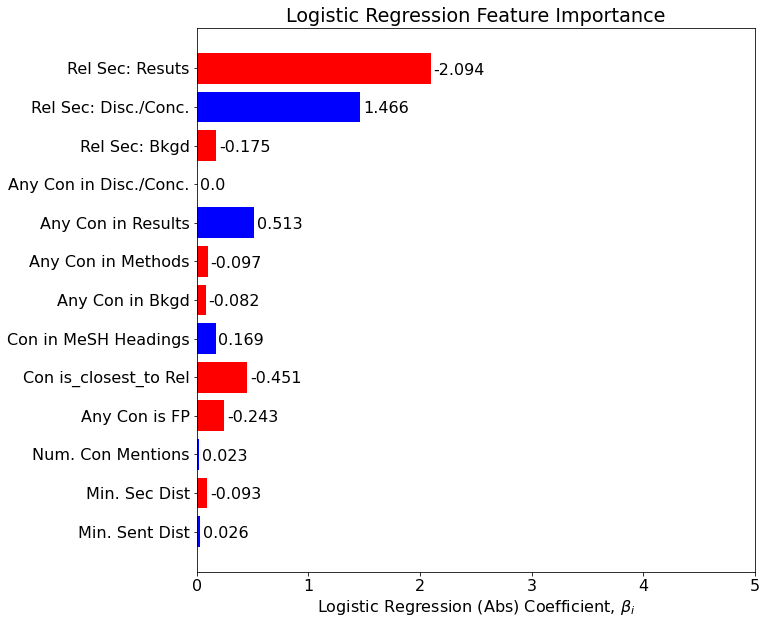

Accuracy 0.7272727272727273
Feature min_sent_dist, Score: 0.24711836918417204
Feature min_sec_dist, Score: 0.21274750066511747
Feature num_con_mentions, Score: 0.09985350599648155
Feature any_con_fp, Score: 0.022760324080349018
Feature is_closest_cont_by_sent, Score: 0.026522533644319182
Feature con_in_mesh_headings, Score: 0.022379613577941555
Feature any_con_background, Score: 0.0236502511671635
Feature any_con_methods, Score: 0.018104968637357825
Feature any_con_results, Score: 0.023288093400248504
Feature any_con_disc_conc, Score: 0.0
Feature norm_rel_sec_background, Score: 0.024981680931858288
Feature norm_rel_sec_discussion and conclusion, Score: 0.14383149408483942
Feature norm_rel_sec_results, Score: 0.13476166463015163


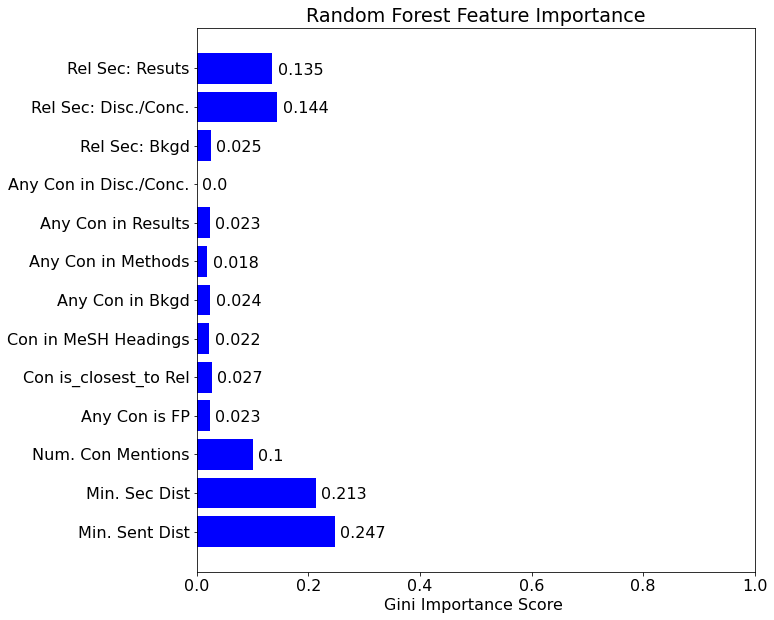

Feature min_sent_dist, Score: 0.22745098695158958
Feature min_sec_dist, Score: 0.16470588371157646
Feature num_con_mentions, Score: 0.03921568766236305
Feature any_con_fp, Score: 0.010457515716552734
Feature is_closest_cont_by_sent, Score: 0.02091503292322159
Feature con_in_mesh_headings, Score: 0.013071894645690918
Feature any_con_background, Score: 0.0
Feature any_con_methods, Score: -0.0013071894645690918
Feature any_con_results, Score: -0.0026143793016672134
Feature any_con_disc_conc, Score: 0.0
Feature norm_rel_sec_background, Score: 0.01437908411026001
Feature norm_rel_sec_discussion and conclusion, Score: 0.2405228815972805
Feature norm_rel_sec_results, Score: 0.02352941259741783


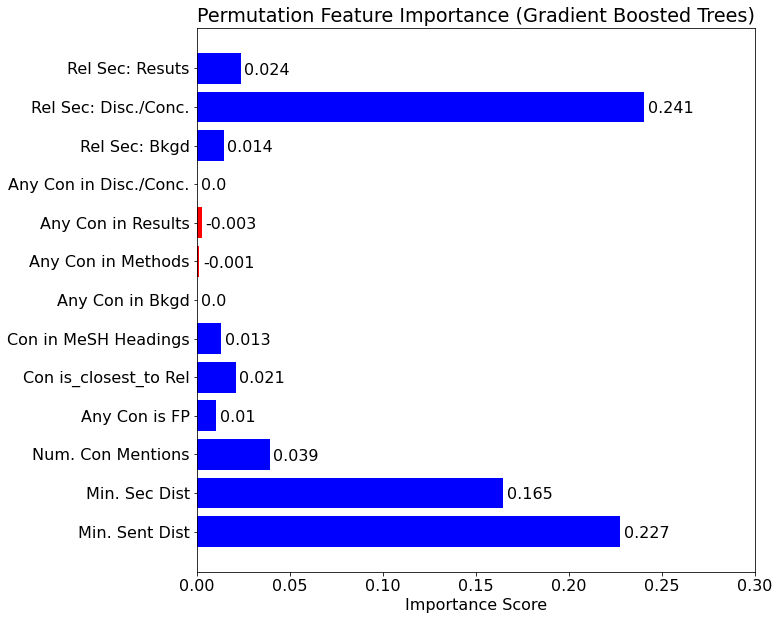

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance


fig = plt.figure(figsize=(10, 10))

col_names_short = ["Min. Sent Dist", "Min. Sec Dist", "Num. Con Mentions", "Any Con is FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Any Con in Bkgd", "Any Con in Methods", "Any Con in Results", "Any Con in Disc./Conc.", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Resuts"]

log_reg = LogisticRegression(penalty='l2', random_state=44, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = log_reg.coef_.flatten()
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.025, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 5)
plt.xlabel("Logistic Regression (Abs) Coefficient, $\\beta_i$")
plt.title("Logistic Regression Feature Importance")
plt.show()
          
          


fig = plt.figure(figsize=(10, 10))

rand_forest = RandomForestClassifier(random_state=44)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred)

importance = rand_forest.feature_importances_
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.01, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 1)
plt.xlabel("Gini Importance Score ")
plt.title("Random Forest Feature Importance")
plt.show()
          



fig = plt.figure(figsize=(10, 10))


gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train, y_train)

results = permutation_importance(gbc, X_train.astype(np.float32), y_train.astype(np.float32), scoring='neg_mean_squared_error', random_state=44)
importance = results.importances_mean
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score: {v}")
        
        
polarity_colors = ["red" if x < 0 else "blue" for x in importance]      

plt.barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
#plt.yticks(np.arange(len(importance)), list(X_train.columns), rotation=70)
plt.yticks(np.arange(len(importance)), col_names_short, rotation=0)
for i,v in enumerate(importance):
    plt.text(abs(v)+.002, i-.16, str(round(v, 3)), color="black")
plt.xlim(0, 0.3)
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance (Gradient Boosted Trees)")
plt.show()
          
          





###### Some instances of differences

In [67]:
pd.set_option('display.max_colwidth', -1)

X_test["prediction"] = y_pred
ena_grp_result = model_contra_grp_df.merge(X_test, how="inner", left_index=True, right_index=True)
ena_grp_result[ena_grp_result.prediction != ena_grp_result.annotation]

# Some instances of differences

/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


rel  \
1488   Conversely , a mutation resulting in a GDP bound form of rab6 ( T27N ) shows more prominent Golgi structures and an accumulation of marker proteins in the late Golgi network .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1697   The phenotypic interaction of the wrt screen alleles was consistent with a decrease in the amount of N available for signaling on the cell surface ( Verheyen et al. 1996 ) .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1908   To determine how Drab6 affects Drosophila development beyond the larval stage , three different types of mutants were analyzed .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2023   While an essential gene , Drab6 mutations did not affect the development of the eye , wing , and leg , nor the bristle structures within these tissues .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
7865   Echoing this notion , at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ( XREF_BIBR ) .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
7870   Echoing this notion , at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ( XREF_BIBR ) 

In [41]:
X_train

min_sent_dist  min_sec_dist  num_con_mentions  any_con_fp  \
25283           81.0          17.0                 3       False   
25311           28.0           4.0                 3       False   
7883            87.0          10.0                 1       False   
1871           182.0          52.0                 1       False   
30226           25.0           7.0                 7       False   
...              ...           ...               ...         ...   
2270             9.0           1.0                 1       False   
8034           116.0          27.0                 3       False   
25317           26.0           3.0                 3       False   
25276           21.0           3.0                 2       False   
1060            33.0          12.0                15        True   

       is_closest_cont_by_sent  con_in_mesh_headings  any_con_background  \
25283                    False                     0                True   
25311                    False                     0               False   
7883                     False                     0                True   
1871                     False                     0               False   
30226                    False                     0               False   
...                        ...                   ...                 ...   
2270                     False                     0               False   
8034                      True                     0                True   
25317                    False                     0               False   
25276                    False                     0                True   
1060                     False                     1               False   

       any_con_methods  any_con_results  any_con_disc_conc  \
25283            False             True              False   
25311            False             True              False   
7883             False            False              False   
1871             False            False              False   
30226             True            False              False   
...                ...              ...                ...   
2270             False            False              False   
8034              True            False              False   
25317            False             True              False   
25276            False            False              False   
1060              True             True              False   

       norm_rel_sec_background  norm_rel_sec_discussion and conclusion  \
25283                        0                                       1   
25311                        0                                       1   
7883                         1                                       0   
1871                         0                                       1   
30226                        0                                       1   
...                        ...                                     ...   
2270                         0                                       1   
8034                         0                                       1   
25317                        0                                       1   
25276                        0                                       1   
1060                         0                                       0   

       norm_rel_sec_results  
25283                     0  
25311                     0  
7883                      0  
1871                      0  
30226                     0  
...                     ...  
2270                      0  
8034                      0  
25317                     0  
25276                     0  
1060                      1  

[153 rows x 13 columns]

#### Evaluation on Jake's Context dataset 

Now let's see if we can do a bit more validation using Jake's annotations

In [43]:
import bioc
import pandas as pd

import re

import lit_contextizer as lc
from lit_contextizer.data_models.PaperUtilities import extract_features
from lit_contextizer.data_models.Utilities import create_contexts
from lit_contextizer.data_models.Sentence import Sentence
from lit_contextizer.data_models.Extractable import Relation
from lit_contextizer.data_models.Paper import Paper

pd.set_option('display.max_colwidth', -1)


jake_papers = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/jake_fifty/fifty_docs.bioc.xml"


annots_map = {}
df_list = []

paper2contexts = {}

with open(jake_papers, 'rb') as f:
    parser = bioc.BioCXMLDocumentReader(f)

    for doc in parser:
        
        # pmid = doc.infons["pmid"]
        # pmid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{pmid}.biocxml"
        # !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pubmed --identifier={pmid} --email=dnsosa@stanford.edu --o={pmid_out_path} --oFormat=biocxml

        # pmcid = doc.infons["pmcid"]
        # pmcid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/PMC{pmcid}.txt"
        # !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={pmcid_out_path} --oFormat=txt      
        
        rel_con_assoc = {}
        pmid = doc.infons["pmid"]
        paper2contexts[pmid] = set()
        for sec in doc.passages:
            for annot in sec.annotations:
                a_type = annot.infons["type"]
                if a_type in ["CellContext", "Species"]:
                    a_id = annot.infons["conceptid"]
                    a_norm = annot.text
                    annots_map[a_id] = a_norm
                
                if a_type == "CellContext":
                    paper2contexts[pmid].add(a_norm)
                    
        
        for sec in doc.passages:
            if len(sec.relations) > 0:
                for rel in sec.relations:
                    if rel.infons["is_citing"] == "False":
                        sen = rel.infons["formatted_sentence"]
                        cons_list = rel.infons["contexts"].split("|")
                        for assoc_con in [v.split(":")[1] for v in cons_list]:
                            row = {"rel": sen, 
                                   "con": annots_map[assoc_con], 
                                   "pmid": doc.infons["pmid"],
                                   "pmcid": doc.infons["pmcid"]
                                  }
                            df_list.append(row)

                
                            
jake_df = pd.DataFrame(df_list)
jake_df.rel = jake_df.apply(lambda row: re.sub('<[^<]+>', "", row["rel"]),axis=1)
jake_df['annot'] = 'positive'
jake_df['con'] = jake_df['con'].str.lower()



paper_ids = set(list(jake_df.pmid))  # NOTE: NO PM in front
jake_paper_pile = {}

# extract jake features

paper_dfs = []
for paper_id in paper_ids:
    paper_event_dict = {}
    pmid_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{paper_id}.biocxml"
    with open(pmid_file, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        for doc in parser:
            pmcid = doc.infons["pmcid"]
            paper_title = doc.infons["title"]
    
    full_text_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/{pmcid}.txt"  # NOTE comes with the PMC prefix
    # Open the full text
    with open(full_text_file, 'r') as f:
        pmc_txt = f.read()
        pmc_txt_reform = re.sub('\n\n', '. ', pmc_txt)

    # Create the paper
    paper = Paper(title=paper_title,
                  abstract=None,
                  full_text=pmc_txt_reform,
                  doi=paper_id,
                  pmcid=pmcid,
                  pmid=paper_id,  # DO NOT HAVE PMID FOR THESE
                  journal=None)


    # Create the relation objects    
    rel_list = list(set(jake_df[jake_df.pmid==paper_id].rel))
    for rel in rel_list:
        rel_reform = re.sub('<[^<]+>', "", rel)  # Remove XML tags
        relation = Relation(main_verb=None,
                            entity1=None,
                            entity2=None,
                            text=rel_reform,  # Remove XML tags
                            paper_pmcid=pmcid,  # TODO: fix these all being the same!
                            paper_pmid=paper_id,
                            paper_doi=paper_id,
                            start_idx=None,
                            end_idx=None,
                            sent_idx=None,
                            sentence=Sentence(rel_reform))

        paper.add_relation(relation)


    unique_con_terms = list(set(jake_df[jake_df.pmid==paper_id].con))
    for con in unique_con_terms:
        generic_filler_attributes = {"type": None, "pos": -9999}
        paper_event_dict[con.lower()] = generic_filler_attributes

    create_contexts(paper, paper_event_dict, pmc_txt_reform)
    jake_paper_pile[paper_id] = paper

jake_pmc_dir = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/"
jake_pubmed_dir = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/"

jake_features_df = extract_features(jake_paper_pile, 
                                    do_calculate_in_mesh=True,
                                    do_calculate_pmi=False,
                                    biocxmls_pmc_dir=jake_pmc_dir,
                                    biocxmls_pubmed_dir=jake_pubmed_dir)




/var/folders/p9/8pp847bn49bbsx879fpbsqs00000gn/T/ipykernel_3104/4239907716.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


19


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/28927100.biocxml'

In [40]:
{key: value for key, value in paper2contexts.items() if key in jake_paper_pile.keys()}


{'27895401': {'1.2',
  'Cancer cells',
  'NCI-N87',
  'SNU-216',
  'cancer cell',
  'cancer cells',
  'min',
  'tumor cells'},
 '29531464': {'BAX',
  'Bax',
  'RP4',
  'SW480',
  'anchorage-independent growth',
  'and 1',
  'cancer cell',
  'cancer cell line',
  'cancer cells',
  'mimic'},
 '31205511': {'293T',
  'A549',
  'H1299',
  'H322',
  'Madison',
  'SEM',
  'Wei',
  'cancer cell',
  'cancer cells',
  'mimic'},
 '33219033': {'Bam',
  'CA1',
  'CMV',
  'Cy3',
  'Fisher',
  'HEK-293A',
  'HEK-293T',
  'Hpa',
  'Neuro2a',
  'Neuron',
  'Neurons',
  'PDF',
  'S10',
  'SEM',
  'SHSY5Y',
  'SP5',
  'Sal',
  'T cells',
  'TCS',
  'bona',
  'cancer cell',
  'hippocampal neuron',
  'human embryonic kidney',
  'min',
  'neuron',
  'neurons'},
 '30196810': {'Fisher',
  'SAS',
  'SEM',
  'oocyte',
  'sperm',
  'spermatozoa',
  'trophoblast'},
 '30483810': {'1.2',
  'AP-1',
  'DU145',
  'F12',
  'Fisher',
  'LNCaP',
  'PC3',
  'adipose tissue',
  'adiposity',
  'cancer cell',
  'cancer cell 

In [41]:
jake_df

rel  \
0   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
1   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
2   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
3   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
4   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
5   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
6   Functional experiments indicated that lncRNA RP4 directly upregulated SH3GLB1 expression by acting as a competing endogenous RNA (ceRNA) for miR-7-5p.                                                                                                                               
7   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
8   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
9   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
10  Although it is not clear how BDNF enhances expression of HNRNP A2/B1 in hippocampal neurons, we can present several possible modes of action.                                                                                                                                        
11  CDX2 and NANOG transcript abundance was similar in bovine blastocysts derived from sorted versus unsorted semen, and follistatin increased CDX2 expression in both groups.                                                                                                           
12  Based on these experiments, only leptin significantly induced the expression of QRFP and GPR103 ( Fig. 5A and C ).                                                                                                                                                                   
13  Based on these experiments, only leptin significantly induced the expression of QRFP and GPR103 ( Fig. 5A and C ).                                                                                                                                                                   
14  miR-16 inhibits Wip1 and Bcl-2 expression

In [22]:
jake_paper_pile['33219033'].get_relations()[0].get_text()

'Although it is not clear how BDNF enhances expression of HNRNP A2/B1 in hippocampal neurons, we can present several possible modes of action.'

In [25]:
jake_df[jake_df.pmid=='33219033']

rel  \
10  Although it is not clear how BDNF enhances expression of HNRNP A2/B1 in hippocampal neurons, we can present several possible modes of action.   

                   con      pmid    pmcid     annot  
10  hippocampal neuron  33219033  7679154  positive

In [70]:
len(ena_df[ena_df.annotation])

626

In [77]:
X_test.columns

Index(['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp',
       'is_closest_cont_by_sent', 'con_in_mesh_headings', 'any_con_background',
       'any_con_methods', 'any_con_results', 'any_con_disc_conc',
       'norm_rel_sec_background', 'norm_rel_sec_discussion and conclusion',
       'norm_rel_sec_results'],
      dtype='object')

In [96]:
jake_merged = pd.merge(jake_features_df, jake_df,  how='left', on=["rel", "con"])
jake_merged = jake_merged[jake_merged['con_in_mesh_headings'].notna()]
jake_merged.con_in_mesh_headings = jake_merged.con_in_mesh_headings.astype(int)
jake_mat = pd.get_dummies(jake_merged[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings']])
jake_mat["norm_rel_sec_background"] = 0
jake_preds = gbc.predict(jake_mat[X_test.columns])

In [76]:
jake_merged["log_reg_preds"] = jake_preds

In [79]:
jake_merged[jake_merged.log_reg_preds]

paper_id  \
46   29343851   
48   29343851   
49   29343851   
50   29343851   
51   29343851   
..        ...   
816  27895401   
817  27895401   
818  27895401   
819  27895401   
820  27895401   

                                                                                                                                                     rel  \
46   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
48   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
49   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
50   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
51   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
..                                                                                                                                                   ...   
816  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
817  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
818  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
819  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
820  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              

         con  \
46   mice      
48   ht29      
49   ht29      
50   ht29      
51   mice      
..    ...      
816  nci-n87   
817  snu-216   
818  nci-n87   
819  snu-216   
820  nci-n87   

                                                                                                                                                                                                                                     con_sent  \
46   Mice (five animals per group) were injected s.c.                                                                                                                                                                                           
48   g  Identification of NDRG2 protein expression in HT29 and HCT116 cells expressing an NDRG2-specific shRNA with or without 2 mM NaBT treatment.                                                                                             
49   In quiescent or serum stimulated HT29 and HCT116 cells, the presence of NDRG2 blocked serum-induced cell cycle progression and caused G1 arrest (Supplementary Fig.                                                                        
50   In accordance, p27 knockdown also blocked NDRG2 effects on AKP activity and E-cadherin expression in HT29 cells (Figs.                                                                                                                     
51   Confirming this point, either p21 or p27 knockdown accelerated the tumor developments, and resumed the growth inhibition of NDRG2 expression in nude mice (Figs.                                                                           
..                                                                                                                                                                ...                                                                           
816  Combined effects of AKT and JNK on the met

In [87]:
jake_merged[(jake_merged.con == "ht29") & (jake_merged.paper_id == "29343851")].drop_duplicates()

paper_id  \
42   29343851   
44   29343851   
45   29343851   
47   29343851   
48   29343851   
..        ...   
462  29343851   
463  29343851   
469  29343851   
471  29343851   
472  29343851   

                                                                                                                                                     rel  \
42   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
44   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
45   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
47   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
48   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
..                                                                                                                                                   ...   
462  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
463  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
469  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
471  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
472  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              

      con  \
42   ht29   
44   ht29   
45   ht29   
47   ht29   
48   ht29   
..    ...   
462  ht29   
463  ht29   
469  ht29   
471  ht29   
472  ht29   

                                                                                                                                                             con_sent  \
42   Expectedly, ectopic NDRG2 expression markedly diminished the cell growth rate and DNA synthesis in HT29 and HCT116 cells (Supplementary Fig.                       
44   Accordingly, the mice with NDRG2-overexpressing HT29 cells developed tumors more slowly than the control group (Figs.                                              
45   a , b  NDRG2 suppresses tumor growth of HT29 cells in nude mice.                                                                                                   
47   in the right limb with 1 × 10 7  HT29 cells.                                                                                                                       
48   g  Identification of NDRG2 protein expression in HT29 and HCT116 cells expressing an NDRG2-specific shRNA with or without 2 mM NaBT treatment.                     
..                                                                                                                                              ...                     
462  a - c  We overexpressed wild-type Skp2 (wSkp2) and Skp2 S72A mutant (mSkp2) using relative expressing lentivirus in HT29 cells with or without NDRG2 expression.   
463  d , e  HT29 cells were transfected with control or Skp2 siRNA.                                                                                                     
469  HT29 cells were transfected with TOPflash or FOPflash and the indicated protein-expressing vectors.                                                                
471  Control or NDRG2-overexpressing HT29 cells were transfected with pcDNA3.1, 

In [92]:
jake_merged[(jake_merged.con == "hepatocytes")].drop_duplicates()

paper_id  \
0   26464440   
1   26464440   
2   26464440   
5   26464440   
8   26464440   
9   26464440   
10  26464440   
11  26464440   
12  26464440   
13  26464440   
17  26464440   
18  26464440   
19  26464440   
22  26464440   
23  26464440   
26  26464440   
27  26464440   
31  26464440   
32  26464440   
33  26464440   
34  26464440   

                                                                                                                                                                         rel  \
0   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
1   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
2   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
5   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
8   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
9   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
10  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
11  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
12  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
13  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
17  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
18  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
19  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
22  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
23  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
26  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
27  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
31  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
32  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
33  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter

In [78]:
jake_mat.preds = jake_preds


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [99]:
sum(jake_preds)/len(jake_merged)

0.3279648609077599

##### Classifying Jake's annotations under the grouped model

In [100]:

jake_merged = pd.merge(jake_features_df, jake_df,  how='left', on=["rel", "con"])
jake_merged = jake_merged[jake_merged['con_in_mesh_headings'].notna()]
jake_merged.con_in_mesh_headings = jake_merged.con_in_mesh_headings.astype(int)

jake_df_grp = jake_merged.groupby(['rel', 'con'])
jj = jake_merged.assign(min_sent_dist=jake_df_grp['sent_dist'].transform(min),
                   min_sec_dist=jake_df_grp['sec_dist'].transform(min),
                   any_con_fp=jake_df_grp['is_con_fp'].transform(max),
                   any_rel_disc_conc=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_rel_background=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('background').any()),
                   any_rel_methods=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('methods').any()),
                   any_rel_results=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('results').any()),
                   any_con_disc_conc=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_con_background=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('background').any()),
                   any_con_methods=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('methods').any()),
                   any_con_results=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('results').any()),)

jj2 = jj[['rel', 'con', 'min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc']].drop_duplicates().dropna()
jake_mat = pd.get_dummies(jj2[['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc']])
jake_mat["norm_rel_sec_background"] = 0
jake_preds = gbc.predict(jake_mat[X_test.columns])



print(sum(jake_preds) / len(jake_preds))

KeyError: "['sent_dist', 'norm_con_sec_discussion and conclusion', 'norm_con_sec_background', 'norm_con_sec_methods', 'sec_dist', 'norm_con_sec_results', 'is_con_fp'] not in index"

### Miscellaneous Scripts

In [15]:
# Code for downloading papers a la Jake!

import json
import os.path
from os import path

# Read in the raw records
pmcid_list= []
pmid_list = []
with open("../input/annotated_documents.json") as doc_json_file:
    count = 0
    # count_not_in_keys = 0

    # For each file, create a new paper object
    for line in doc_json_file:
        record = json.loads(line)

        count += 1
        
        if 'pmc' not in record.keys():
            continue
            
        pmid = record['doc_id'].split("|")[0]
        pmid_list.append(pmid)
        pmcid = record['pmc']
        pmcid_list.append(pmcid)
        out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"
        continue
        
        if not path.exists(out_path):
            !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={out_path} --oFormat=biocxml
        else:
            print("File already downloaded")
        
        # run me....
        #if count == 175:
        #    break

In [22]:
# Code for retrieving the val full texts

pmcids = ["PMC2156142", "PMC3032653", "PMC3135394", "PMC3198449", "PMC3233644", "PMC3461631", "PMC4052680", "PMC4250046", "PMC4746590", "PMC534114"]

for pmcid in pmcids:
    out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"

    if not path.exists(out_path):
            !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={out_path} --oFormat=biocxml
    else:
        print("File already downloaded")


File already downloaded
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3032653.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3135394.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3198449.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3233644.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3461631.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC4052680.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC4250046.biocxml complete
Fetching and converting 1 files from p

In [3]:
# Code for figuring out normalizations

all_section_names = set()
for paper_id in dl.paper_pile:
    paper = dl.paper_pile[paper_id]
    for cont in paper.get_context_list():
        #print(paper.get_section_type(cont))
        all_section_names.add(paper.get_section_type(cont)[1])
        
        
print(all_section_names)

{'results', 'conclusions', 'statistical methods', 'statistics', 'ethics statement', None, 'summary', 'data analysis', 'consent', 'study design', 'statistical analyses', 'funding', 'method', 'competing interests', 'patients and methods', 'author contributions', 'additional information', 'data collection', 'supplementary data', 'authors’ contributions', 'statistical analysis', 'introduction', 'conflict of interest', 'methods', 'conclusion', 'material and methods', 'materials and methods', 'None', 'discussion', 'background', 'limitations', 'participants', 'materials', 'results and discussion', "authors' contributions", 'abbreviations'}


#### Future analyses-- New feature: BERT

In [27]:
from biobert_embedding.embedding import BiobertEmbedding

text = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."\

# Class Initialization (You can set default 'model_path=None' as your finetuned BERT model path while Initialization)
biobert = BiobertEmbedding()

word_embeddings = biobert.word_vector(text)
sentence_embedding = biobert.sentence_vector(text)

print("Text Tokens: ", biobert.tokens)
# Text Tokens:  ['breast', 'cancers', 'with', 'her2', 'amplification', 'have', 'a', 'higher', 'risk', 'of', 'cns', 'metastasis', 'and', 'poorer', 'prognosis', '.']

print ('Shape of Word Embeddings: %d x %d' % (len(word_embeddings), len(word_embeddings[0])))
# Shape of Word Embeddings: 16 x 768

print("Shape of Sentence Embedding = ",len(sentence_embedding))
# Shape of Sentence Embedding =  768

Text Tokens:  ['breast', 'cancers', 'with', 'her2', 'amplification', 'have', 'a', 'higher', 'risk', 'of', 'cns', 'metastasis', 'and', 'poorer', 'prognosis', '.']
Shape of Word Embeddings: 16 x 768
Shape of Sentence Embedding =  768


In [31]:
import numpy as np

np.array(sentence_embedding)

array([ 2.83243835e-01,  3.25193852e-02, -3.24836403e-01, -1.89797744e-01,
        1.37286400e-02, -6.57656044e-02,  1.63433962e-02,  1.49647802e-01,
        1.95996642e-01, -1.24012209e-01, -6.26029149e-02,  2.20519751e-01,
       -2.77940363e-01,  2.73949921e-01, -3.50311548e-01, -6.33125305e-02,
       -1.37052551e-01, -5.65508194e-02,  7.48364180e-02, -2.72994816e-01,
       -2.46691063e-01, -1.58229664e-01,  1.42800380e-02,  1.44963771e-01,
        1.73810437e-01, -1.64249659e-01, -8.95009190e-02,  2.09926322e-01,
        1.38269573e-01, -1.83084607e-02, -1.18894465e-01, -5.36878891e-02,
       -1.37515411e-01,  9.45411548e-02,  1.99569568e-01,  4.36311871e-01,
        1.29929453e-01,  4.96568158e-02, -2.58787096e-01,  2.98889309e-01,
        4.10243012e-02, -4.29470479e-01, -1.06973341e-02,  4.23908919e-01,
       -1.50279410e-03, -2.37091288e-01, -9.87396315e-02, -2.81365663e-01,
       -4.10363615e-01, -1.77583858e-01, -2.64389336e-01,  3.33206020e-02,
        1.46826848e-01,  

In [35]:
xx = "This is a sentence. This is another sentence. Hello again. Why yes, this too is yet another sentence. The mitochondria is the powerhouse of the cell"

sembs = [np.array(biobert.sentence_vector(sent)) for sent in xx]

In [36]:
sembs

[array([ 6.67834356e-02,  1.28442124e-01, -3.70868832e-01, -3.48633170e-01,
        -7.68839180e-01,  3.05240244e-01,  3.59766893e-02,  5.94879799e-02,
         2.95784205e-01, -3.49480003e-01,  6.70411205e-03,  3.85696143e-01,
        -5.12853861e-01, -3.85972381e-01, -7.80905068e-01,  3.49618524e-01,
         7.83241466e-02,  3.08229774e-01,  1.56245351e-01,  6.16776884e-01,
        -3.56325537e-01, -3.31258357e-01, -2.51513571e-01,  4.57605207e-03,
        -1.52875215e-01,  3.87392901e-02,  3.22393507e-01, -2.21916378e-01,
        -2.06851289e-01, -1.99035868e-01,  6.22178316e-02,  3.32851321e-01,
        -5.76305926e-01, -4.52923514e-02, -5.74830592e-01,  2.10181117e-01,
        -1.96163612e-03,  1.02796061e-02, -8.92940685e-02, -2.89222091e-01,
         1.08849414e-01, -2.37972081e-01,  3.08350295e-01, -1.63382947e-01,
        -1.85491756e-01, -3.66523176e-01, -2.35449731e-01,  3.07630505e-02,
         1.50850639e-01,  2.13979542e-01,  1.26415059e-01,  3.21338207e-01,
         2.6

In [3]:
len(sentence_embedding)

768

In [15]:
import bioc

paper_ids = ["PMC2156142", "PMC3032653", "PMC3135394", "PMC3198449", "PMC3233644", "PMC3461631", "PMC4052680",
                     "PMC4250046", "PMC4746590", "PMC534114"]


for paper_id in paper_ids:
    ena_full_text_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{paper_id}.biocxml"
    
    #!python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/showMeSH.py --inBioc {ena_full_text_file}
    

    # Open the full text
    with open(ena_full_text_file, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        for doc in parser:
            print(doc.infons['pmid'])

10459009
21258369
21746850
22039431
22081024
23050142
24467442
25438156
26856619
15550174


In [ ]:
import time
from biobert_embedding.embedding import BiobertEmbedding

biobert = BiobertEmbedding()
 
start = time.time()
ct = 0
for sent in dl.paper_pile['PMC5292560'].get_full_text().split(". "):
    
    ct += 1
    sentence_embedding = biobert.sentence_vector(sent)
    
    print(f"{time.time() - start} seconds elapsed")

In [ ]:
import os
import bioc
import time
from biobert_embedding.embedding import BiobertEmbedding

biobert = BiobertEmbedding()

all_papers_embs = []

for pmcid in dl.ena_paper_pile:
    
    pmcid_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"

    if os.path.exists(pmcid_path):
        full_text_in_sections = []
        full_text_embs = []
        sec_mapper = {}
        with open(pmcid_path, 'rb') as f:
            parser = bioc.BioCXMLDocumentReader(f)
            document = parser.__next__()

            for sec_idx, sec in enumerate(document.passages):
                full_text_in_sections.append(sec.text)
                sec_type = sec.infons['subsection']
                sent_list = [s + "." for s in sec.text.split(". ") if s]
                sec_embs = []
                for sent in sent_list:
                    sec_mapper[sent] = (sec_idx, sec_type)
                    sent_emb = biobert.sentence_vector(sent)
                    sec_embs.append(sent_emb)
                    
                full_text_embs.append(sec_embs)
            
    all_papers_embs.append(full_text_embs)

to be continued...

#### For looking at MeSH headings a la Jake's showMeSH script

In [3]:

import os
import bioc

pmids = ["10459009",
"21258369",
"21746850",
"22039431",
"22081024",
"23050142",
"24467442",
"25438156",
"26856619",
"15550174"]

for pmid in pmids:
    
    pmid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{pmid}.biocxml"

    with open(pmid_out_path, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        doc = parser.__next__()
        pmid = doc.infons['pmid']
        title = doc.infons['title']
        mesh = doc.infons['meshHeadings']
        print(mesh.lower())
        print("drosophila" in mesh.lower())

    
    #if not os.path.exists(pmid_out_path):
    #    !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pubmed --identifier={pmid} --email=dnsosa@stanford.edu --o={pmid_out_path} --oFormat=biocxml
    !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/showMeSH.py --inBioc {pmid_out_path}
    
        
# NOTE: Need to get MeSH headings for all PubMed files





descriptor|d000483|n|alleles	descriptor|d000595|n|amino acid sequence	descriptor|d000818|n|animals	descriptor|d002352|n|carrier proteins~qualifier|q000737|n|chemistry~qualifier|q000235|y|genetics~qualifier|q000378|y|metabolism	descriptor|d003001|n|cloning, molecular	descriptor|d029721|n|drosophila proteins	descriptor|d004331|n|drosophila melanogaster~qualifier|q000033|n|anatomy & histology~qualifier|q000196|n|embryology~qualifier|q000235|n|genetics~qualifier|q000254|y|growth & development	descriptor|d015870|n|gene expression	descriptor|d020043|n|genes, essential~qualifier|q000235|n|genetics	descriptor|d017344|n|genes, insect~qualifier|q000235|n|genetics	descriptor|d005816|n|genetic complementation test	descriptor|d006160|n|guanosine triphosphate~qualifier|q000378|n|metabolism	descriptor|d019476|n|insect proteins~qualifier|q000737|n|chemistry~qualifier|q000235|n|genetics~qualifier|q000378|n|metabolism	descriptor|d007814|n|larva~qualifier|q000235|n|genetics~qualifier|q000254|n|growth & d

AttributeError: 'NoneType' object has no attribute 'lower'

In [5]:
doc

BioCDocument[id=23050142,infons=[title=The role of semaphorins and their receptors in gliomas.,pmid=23050142,pmcid=PMC3461631,doi=10.1155/2012/902854,year=2012,month=10,day=11,journal=Journal of signal transduction,journalISO=J Signal Transduct,authors=Janice Wai Sze Law, Alan Yiu Wah Lee,chemicals=None,meshHeadings=None,supplementaryMesh=None,publicationTypes=Journal Article],passages=[BioCPassage[offset=0,text='The role of semap ... ptors in gliomas.',infons=[section=title],sentences=[],annotations=[],relations=[],],BioCPassage[offset=55,text='Gliomas are the m ... s also discussed.',infons=[section=abstract],sentences=[],annotations=[],relations=[],]],annotations=[],relations=[],]